Integrantes del Equipo:

- Mauricio Florez Prieto
- Gustavo Florez Ortiz
- Jose Pinto Rodriguez
- Yenny Betancur Torres

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
!pip install pandas-profiling  sweetviz

     |████████████████████████████████| 15.1 MB 374 kB/s 


## Ejercicio (Tu base de datos u otra)


Tomar alguno de los siguientes set de datos ( o poronoper uno) y realizar un clasificador, concluyendo cual fue su mejor modelo y porque?

- [Haberman's Survival Data Set](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

- [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)
- [Car safety](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
- [wine](https://archive.ics.uci.edu/ml/datasets/Wine)

A partir de la comprensión inicial de los datos de su dataset

- ¿cuales serian las mejores variables de entrada para hacer clasificación y porque?
- ¿Que otras fuentes de información utilizaría para para mejorar la predicción realizada?

- Que transformaciones requiere realizar sobre los datos


- Que metodo sería el mas conveniente? por que?

- cuál es el mejor inidicador de desempeño del controlador de acuerdo a la logica del negocio?

- Alguna implicación etica sobre las decisiones que estaria tomando este clasificador?


- ¿que técnicas de visualización o muestra de resultados aplicaría?




Para desarrollar este ejercicio se escogio el dataset Wine:

In [3]:

from google.colab import files
files.upload()

Saving wine dataset3.csv to wine dataset3.csv


{'wine dataset3.csv': b'Wine,Alcohol,Malic acid,Ash,Alcalinity of ash  ,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline\r\n1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065\r\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050\r\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185\r\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480\r\n1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735\r\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450\r\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290\r\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295\r\n1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045\r\n1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045\r\n1,14.1,2.16,2.3,18,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510\r\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5,1.17,2.

Carga de dataset y validación de tipos de variables

In [4]:
import pandas as pd
dfWine=pd.read_csv('wine dataset3.csv')
dfWine.columns
dfWine.dtypes


Wine                              int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Asignar el tipo de variable categorico a la variable Wine que representa el tipo de vino

In [5]:

dfWine['Wine']=dfWine['Wine'].astype('category')
dfWine.dtypes


Wine                            category
Alcohol                          float64
Malic acid                       float64
Ash                              float64
Alcalinity of ash                float64
Magnesium                          int64
Total phenols                    float64
Flavanoids                       float64
Nonflavanoid phenols             float64
Proanthocyanins                  float64
Color intensity                  float64
Hue                              float64
OD280/OD315 of diluted wines     float64
Proline                            int64
dtype: object

Correlación de variables

In [7]:
corr_matrix = dfWine.corr(method='pearson')
corr_matrix

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Descripcion de los datos

In [8]:
dfWine.describe(include='all')

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
unique,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,NaN,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,NaN,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,NaN,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,NaN,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,NaN,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000


Almacenar los tipos de vino

In [9]:
TypeWine= dfWine['Wine'].unique()
TypeWine

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

Cantidad de registros por tipo de vino

In [10]:
dfWine.head()
dfWine.Wine.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

Diagrama de cajas y bigotes (Se omite Proline ya que la escala es diferente)

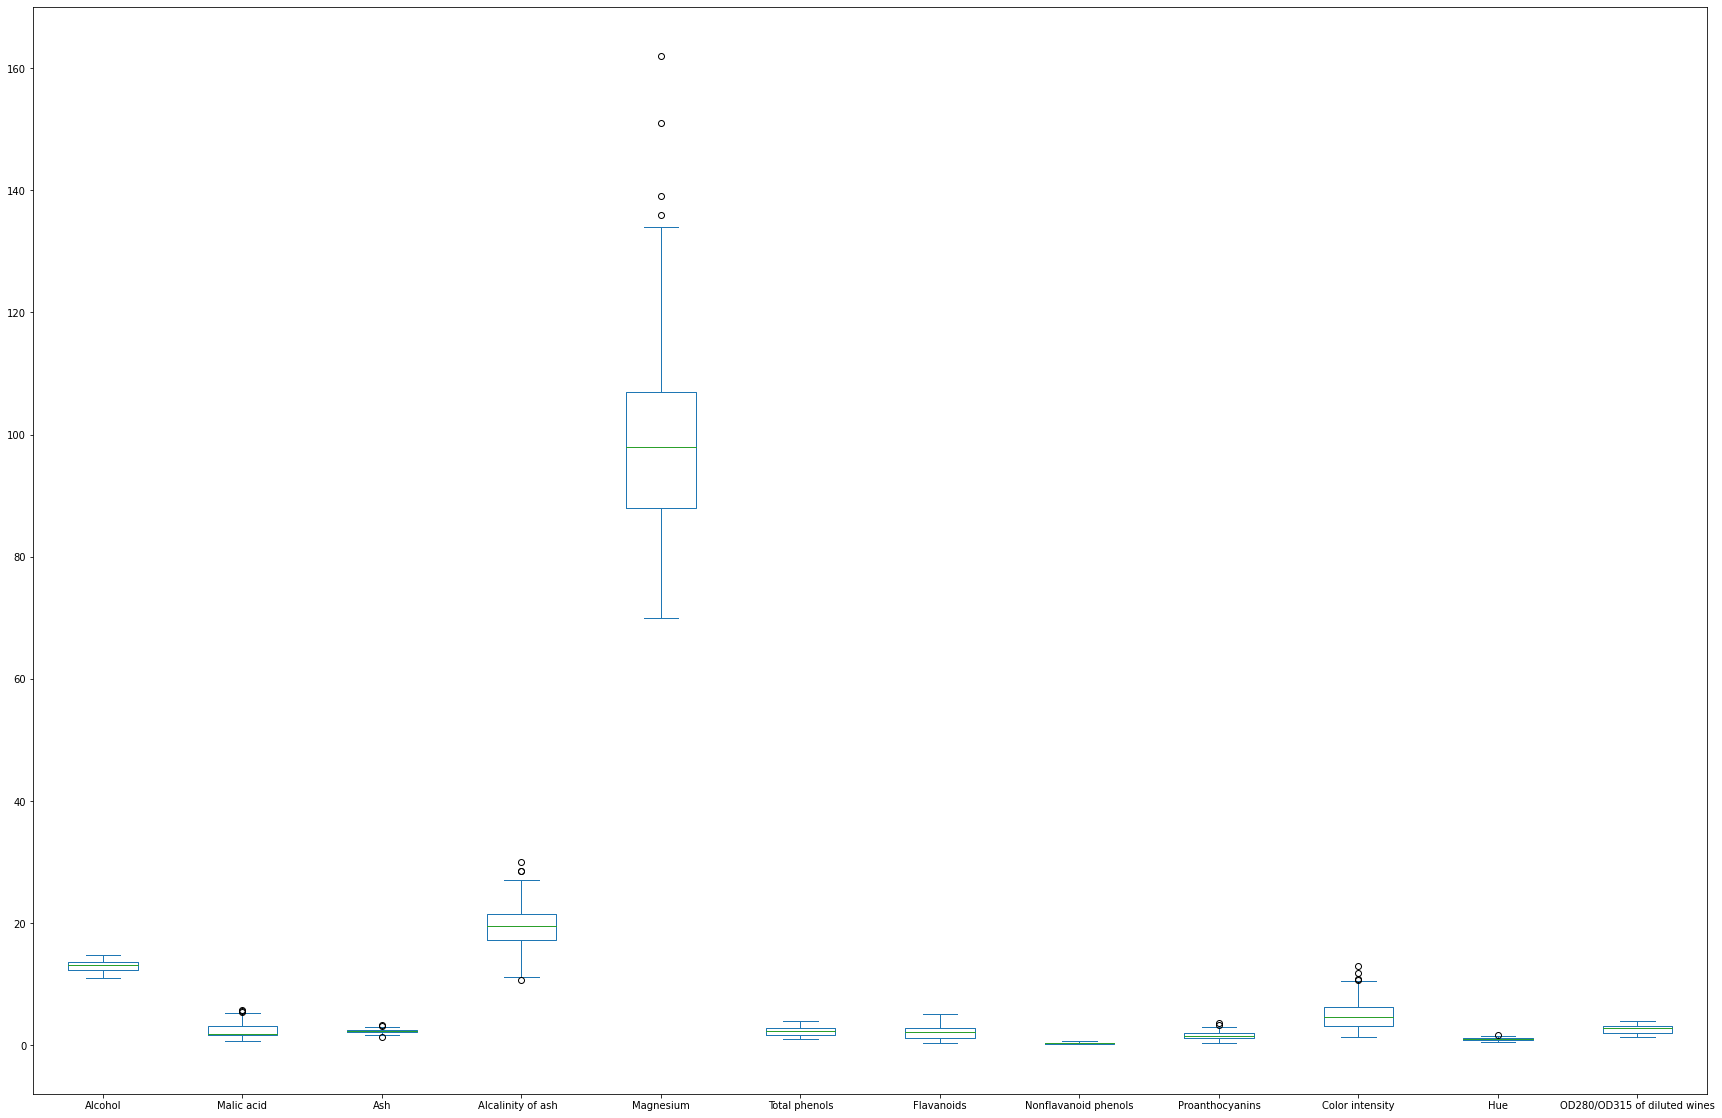

In [11]:
dfWine[dfWine.columns[:-1]].plot.box(figsize=(30,20))

Gráfica de cajas y bigite de proline

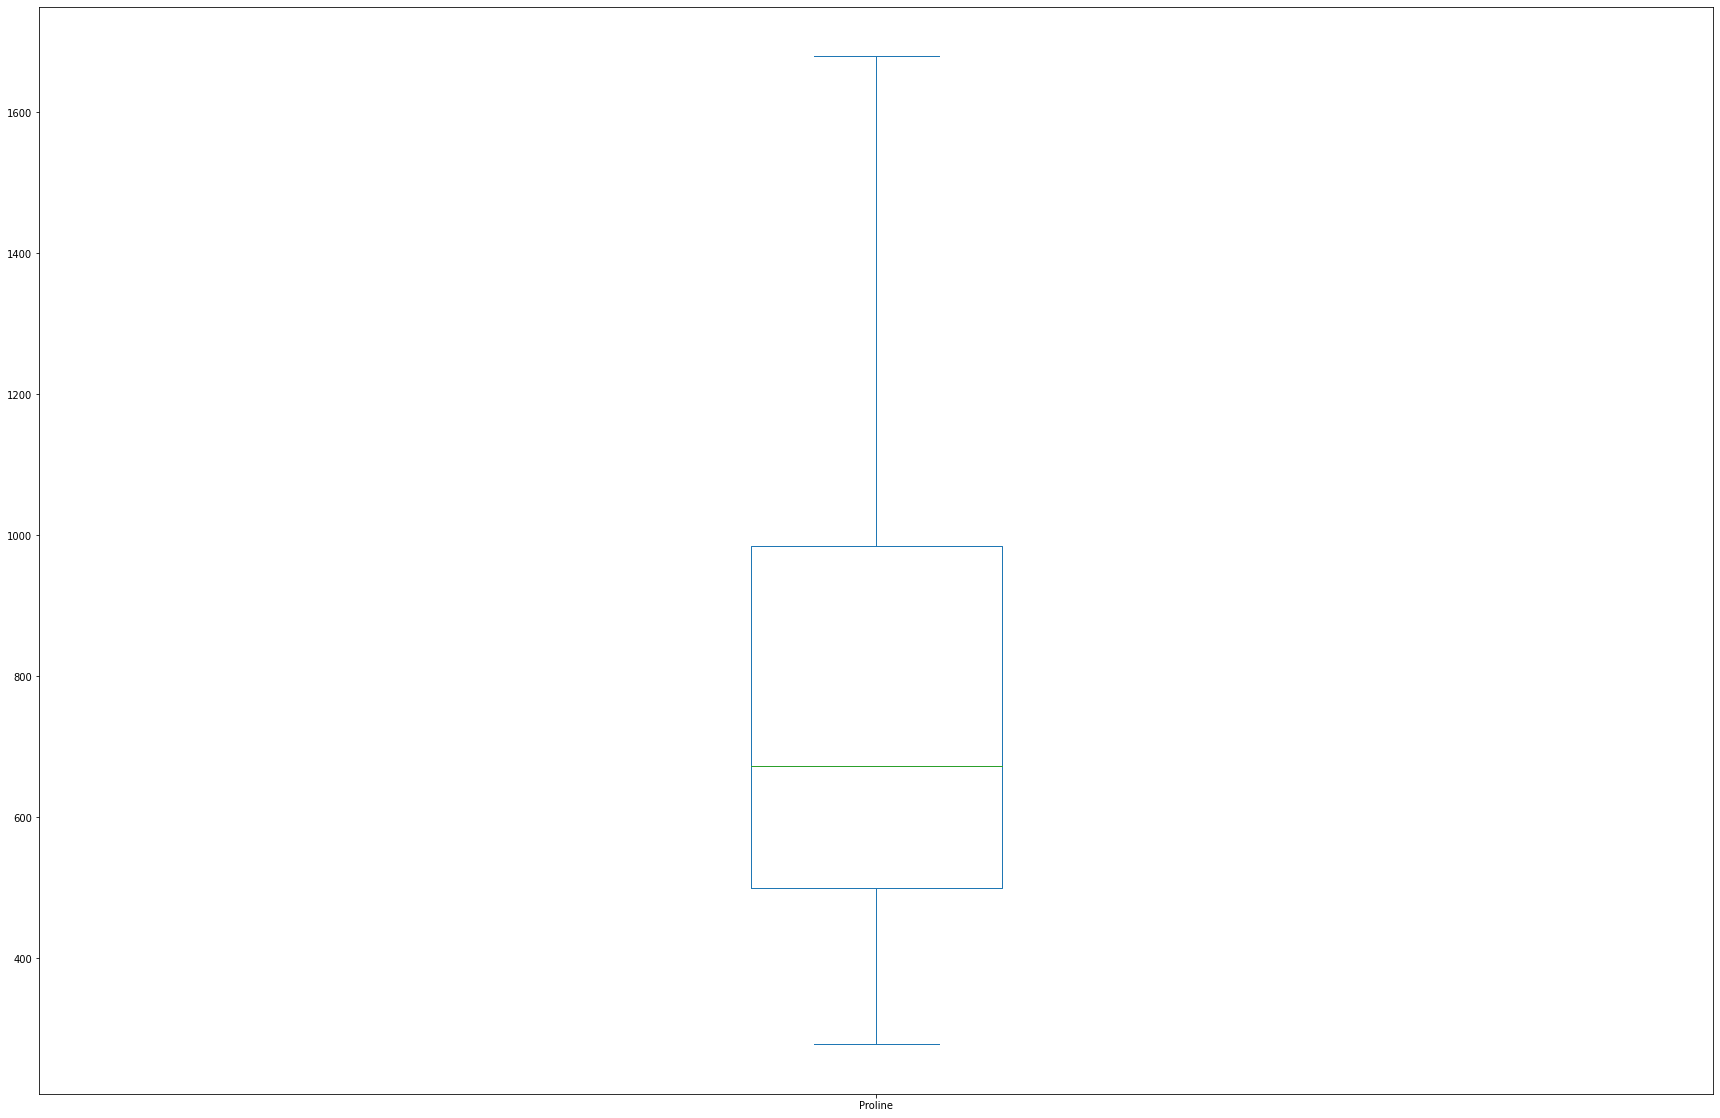

In [12]:
dfWine[dfWine.columns[-1]].plot.box(figsize=(30,20))

Teniendo en cuenta que la escala de una de los atributos del dataset es muy grande comparado con los demas atributos, se genera grafica por pares de atributos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


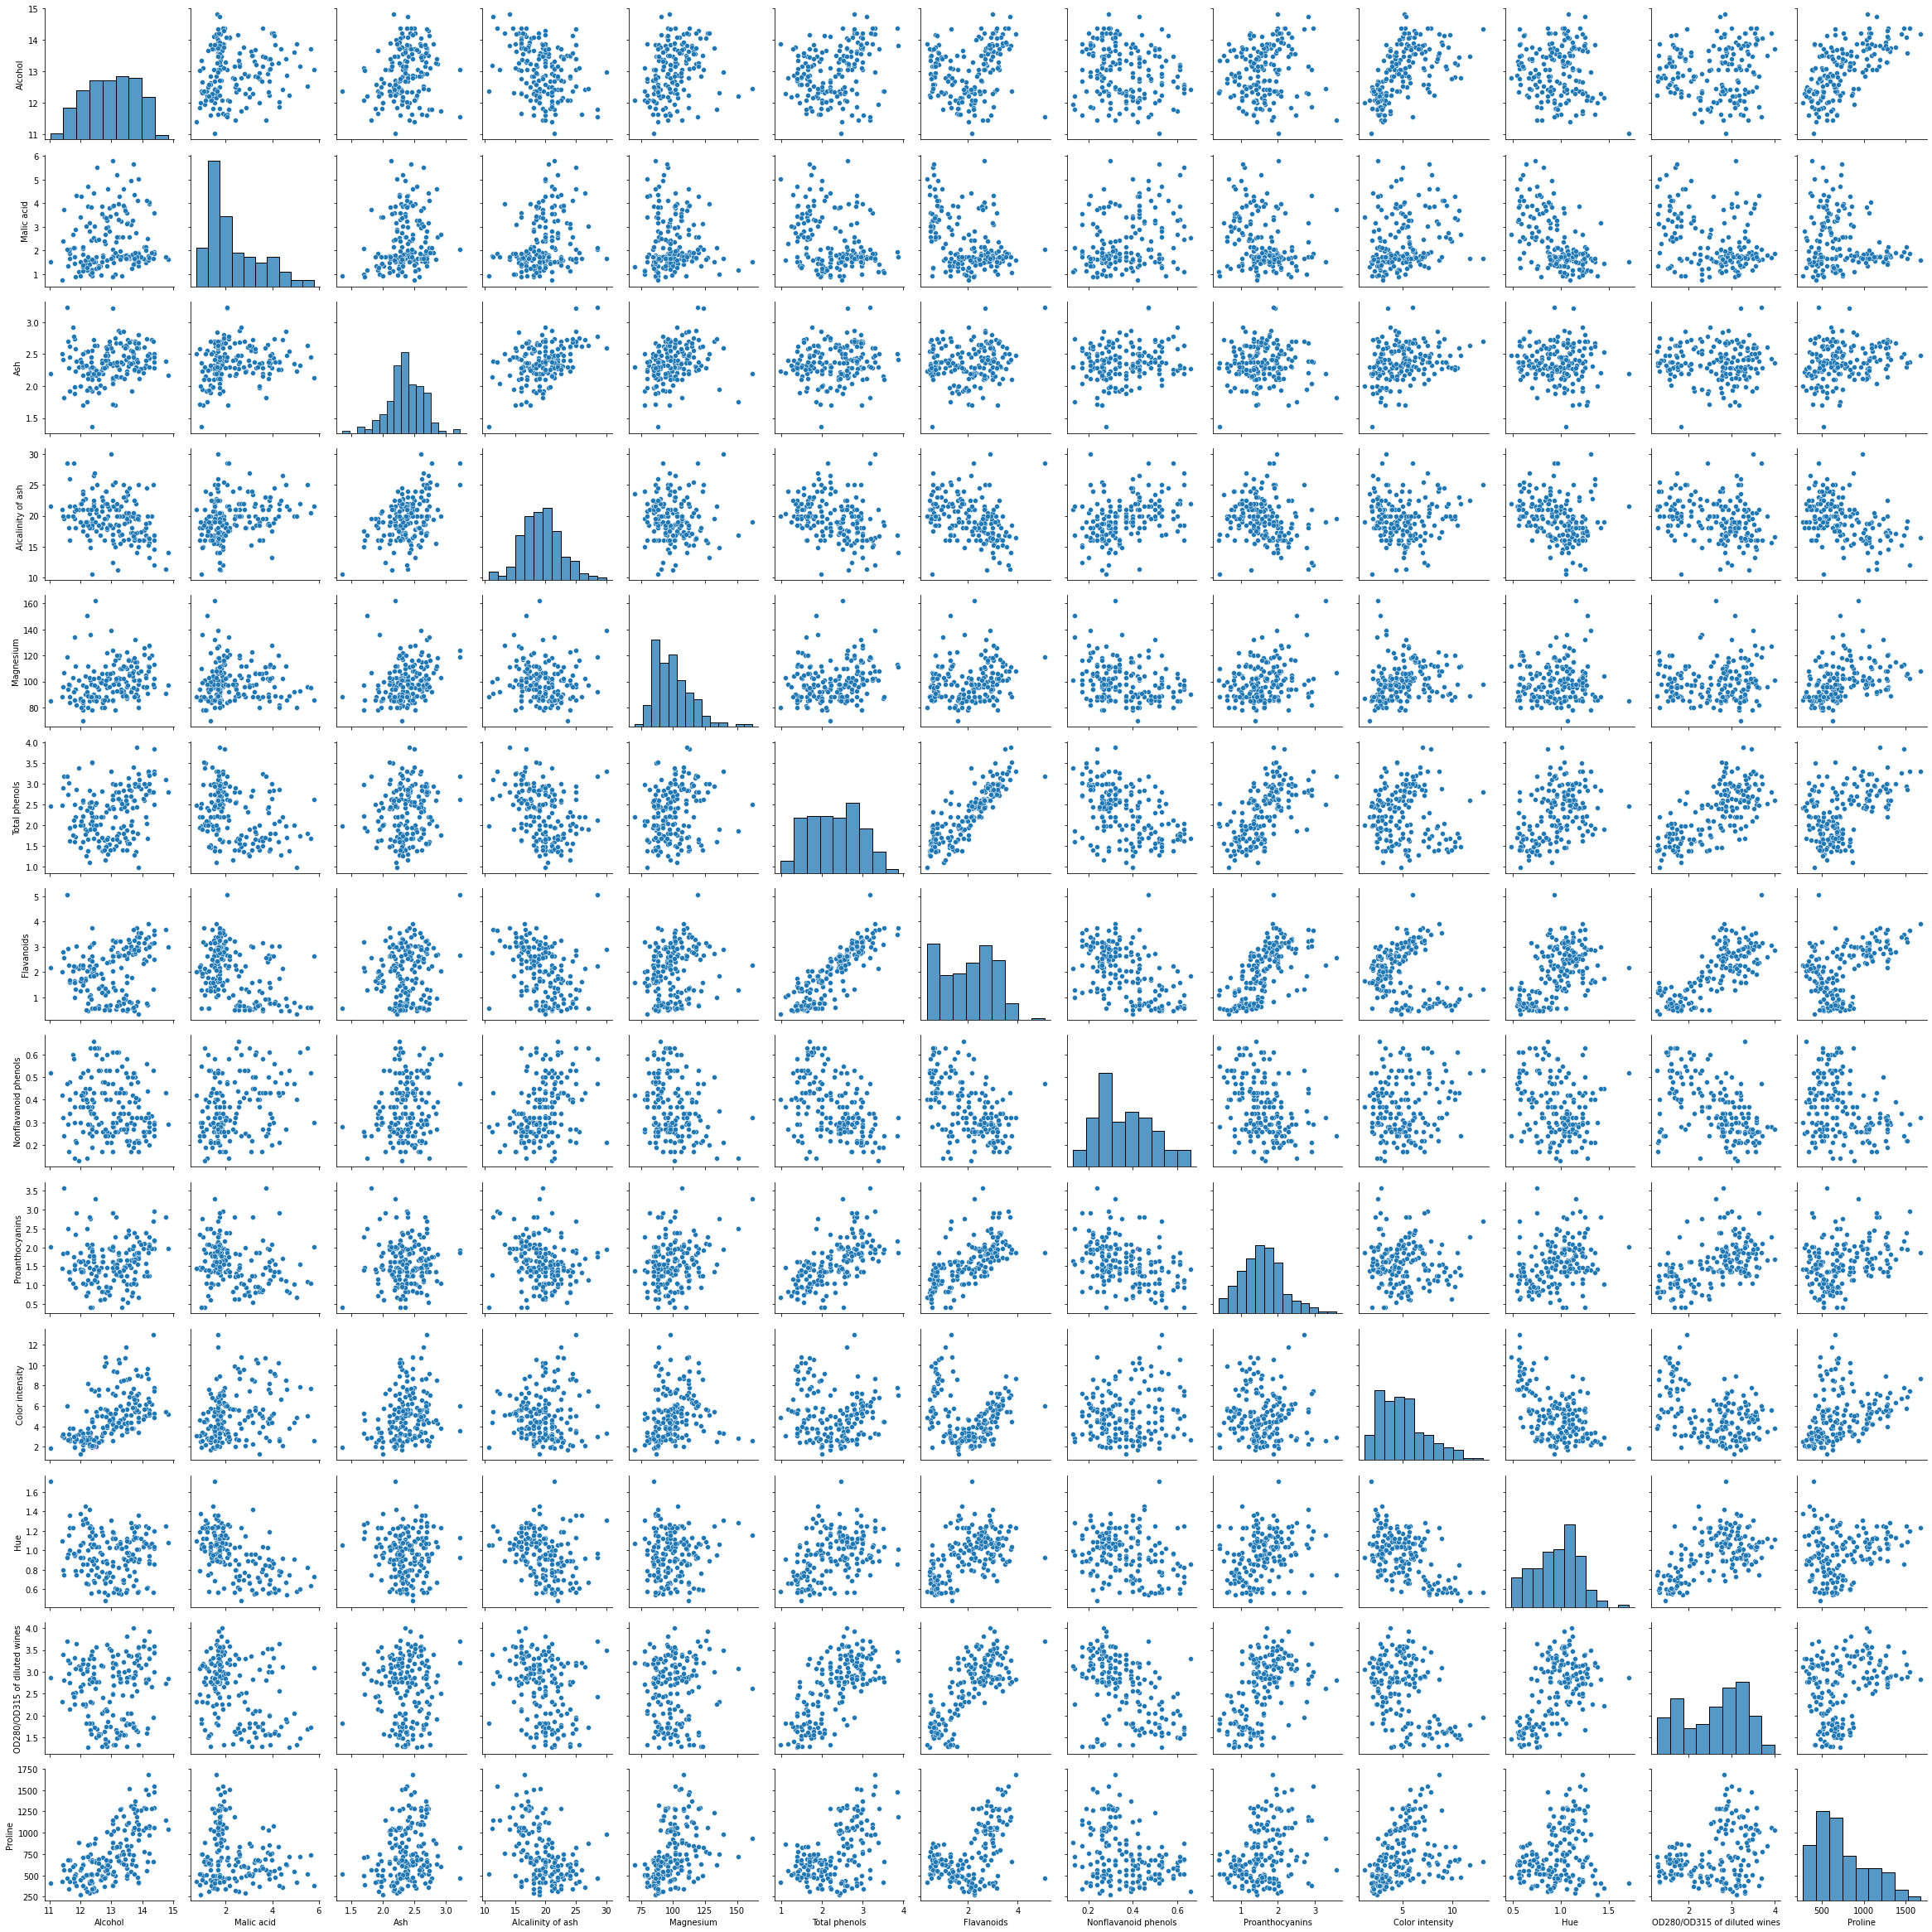

In [13]:
sns.pairplot(dfWine, size=2.5)
plt.tight_layout()

Esta informacion tambien la podemos analizar por medio de sweetviz

                                             |          | [  0%]   00:00 -> (? left)


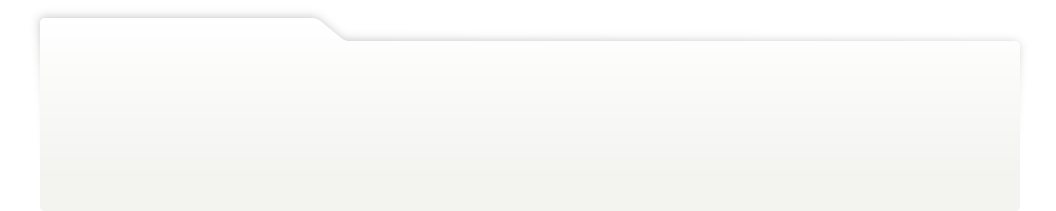
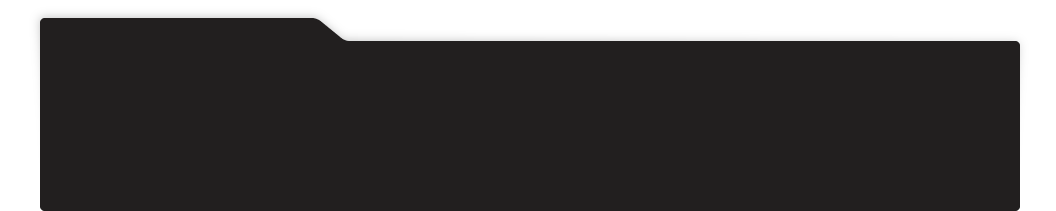
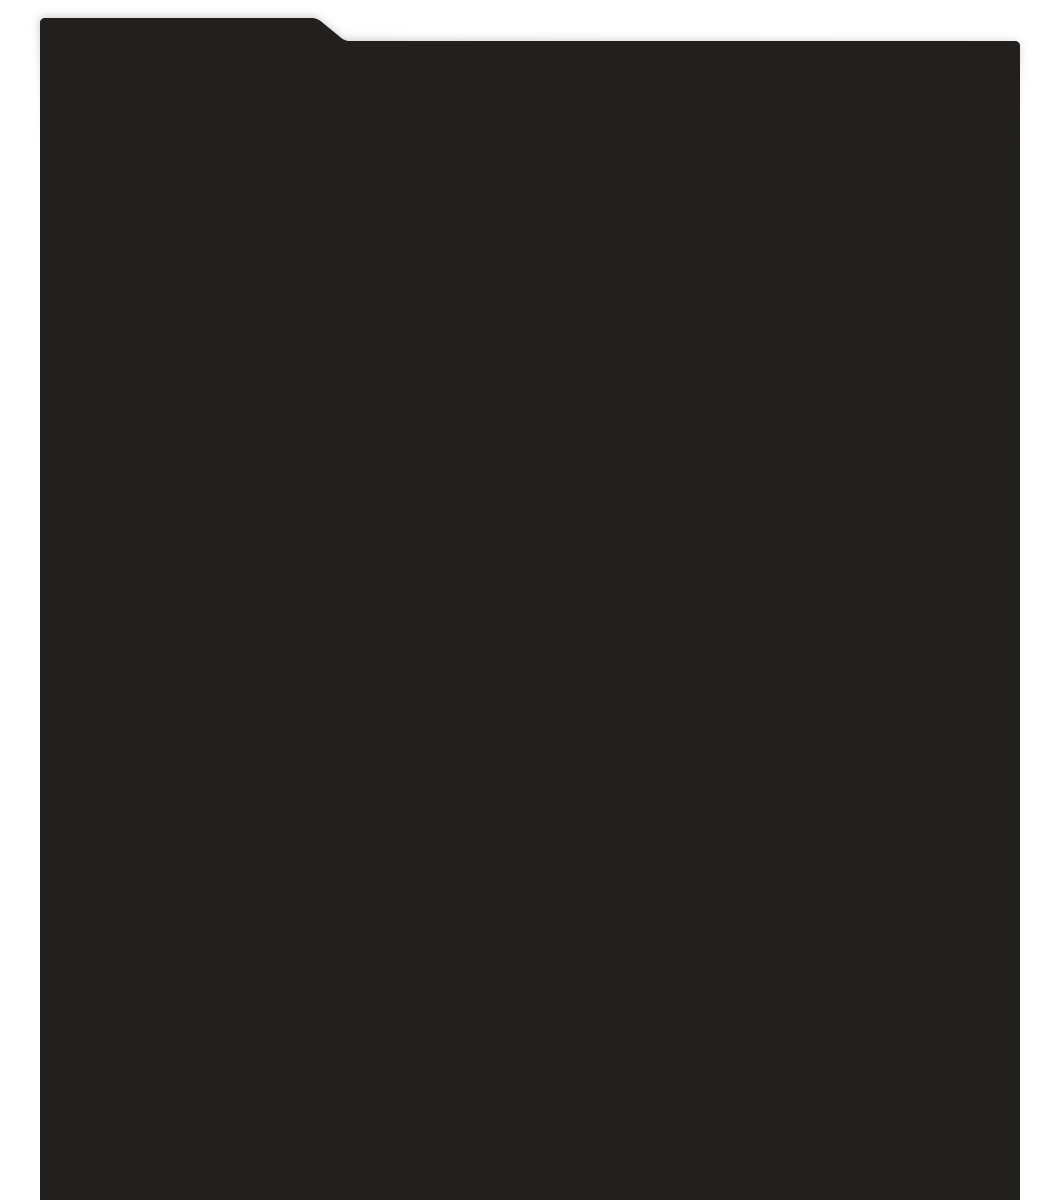
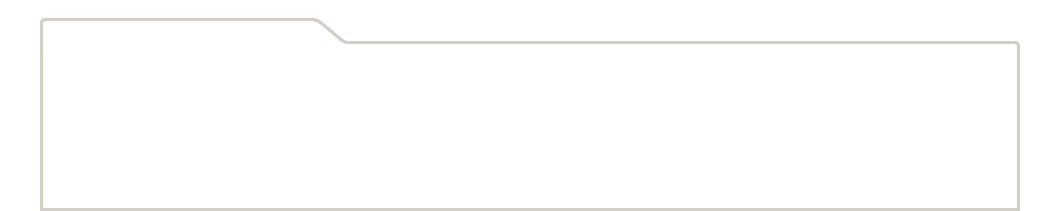
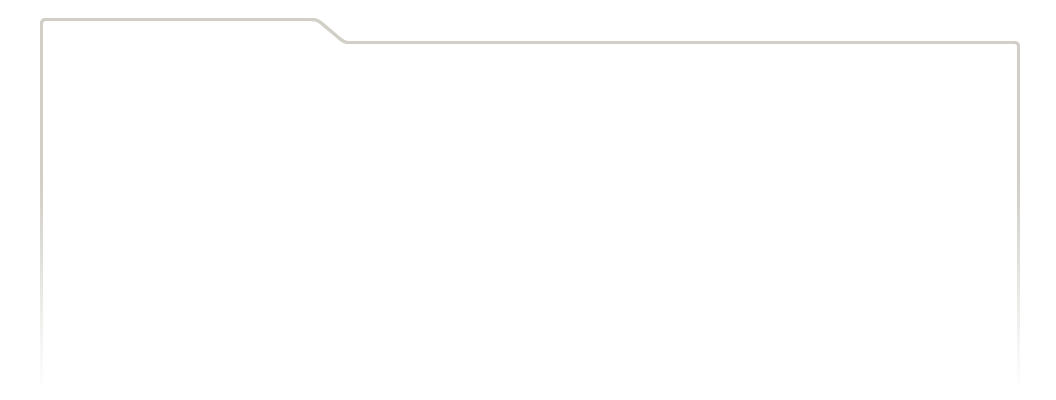
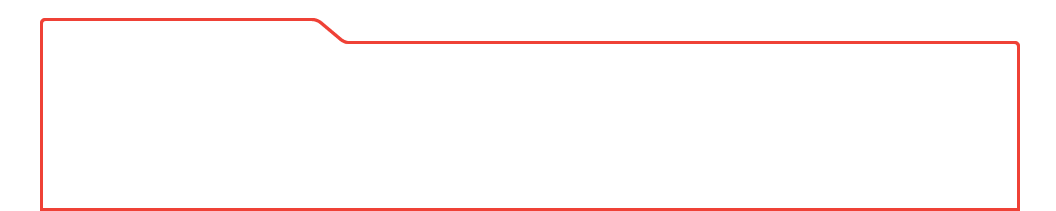
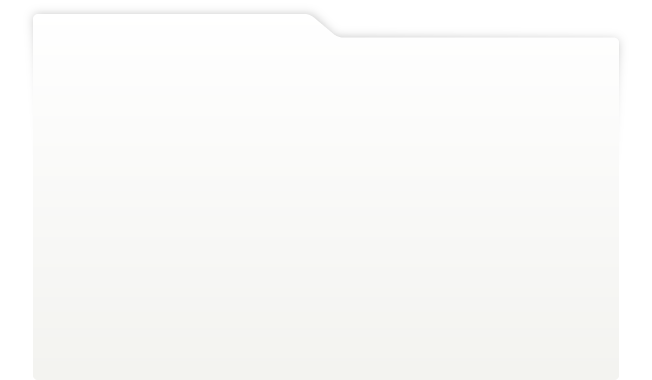
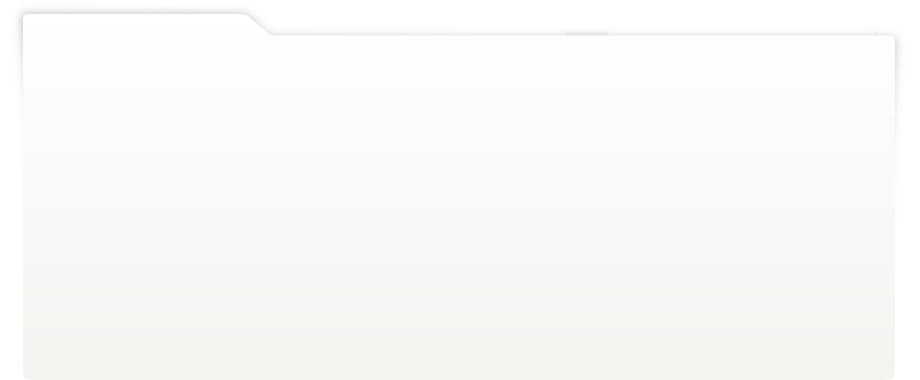
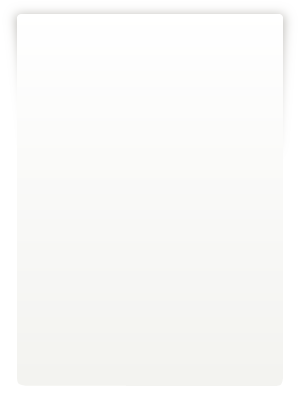
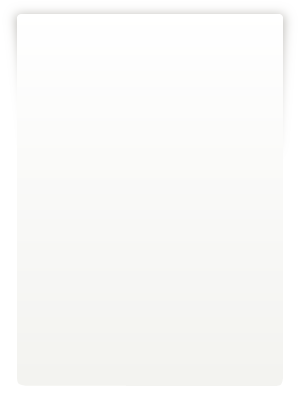
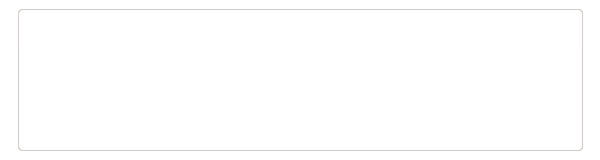
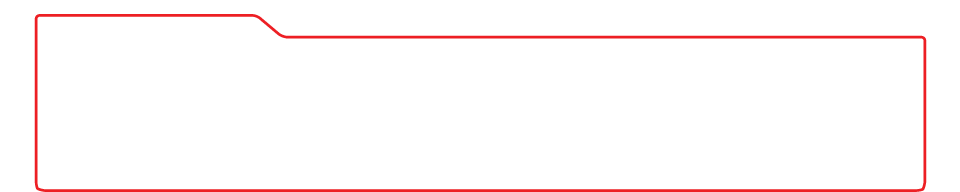
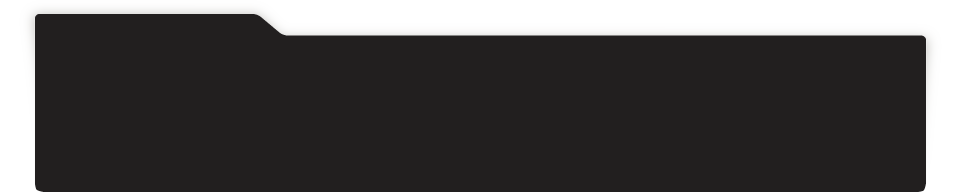
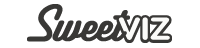
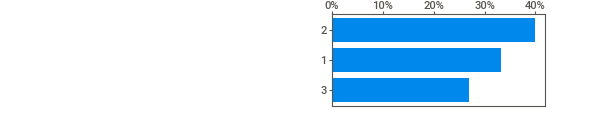
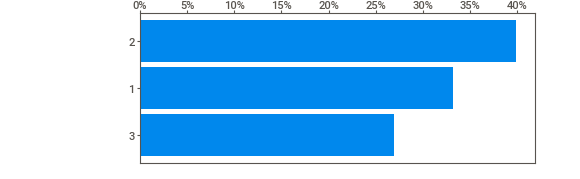
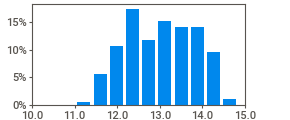
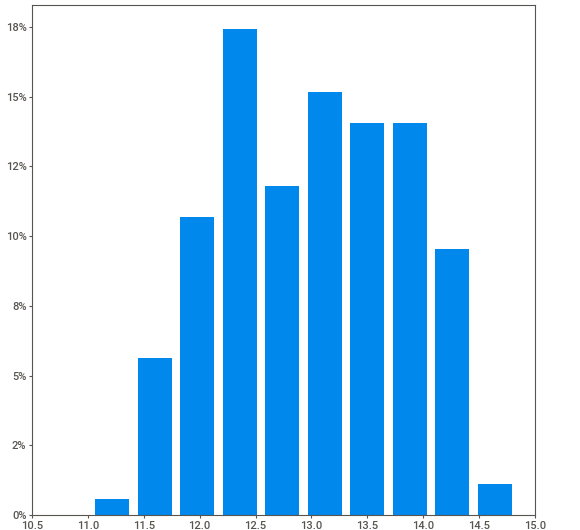
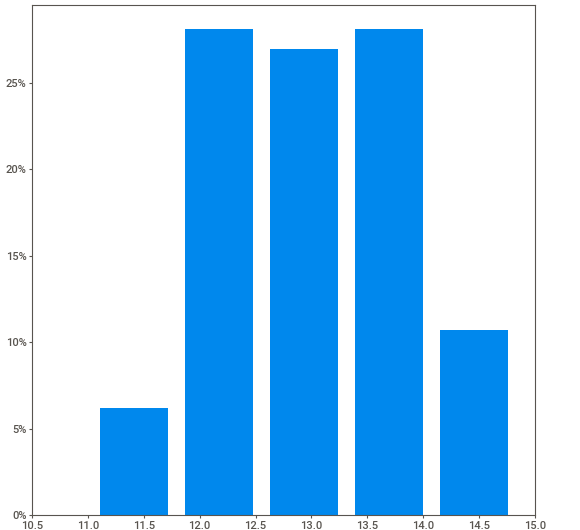
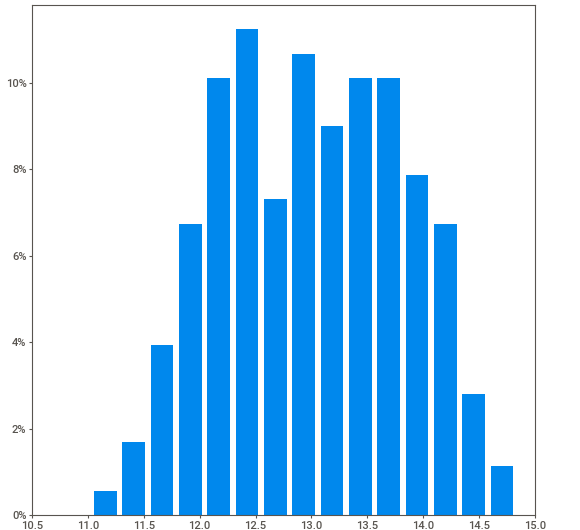
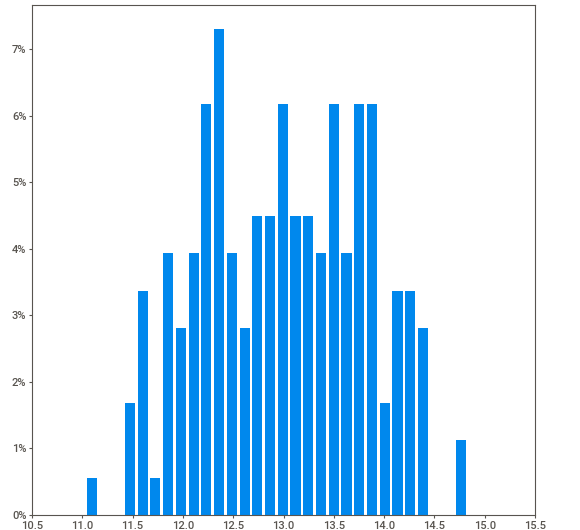
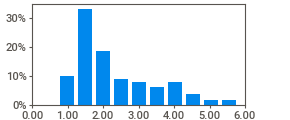
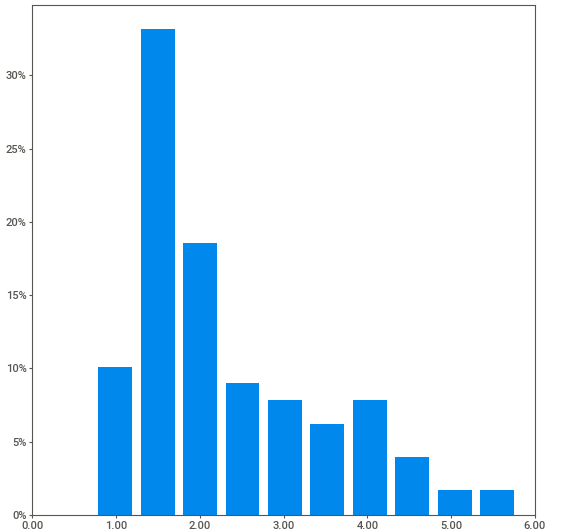
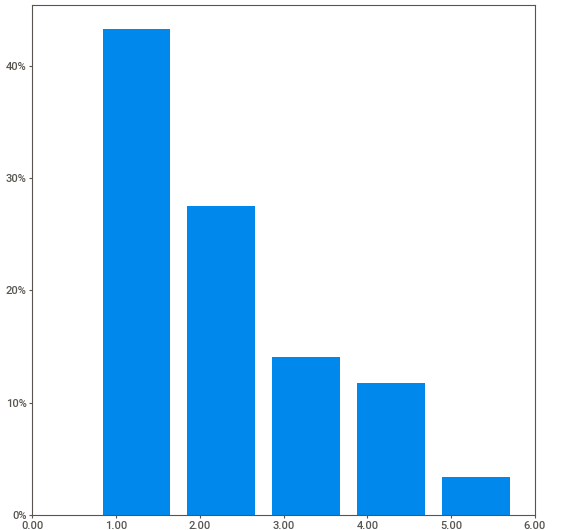
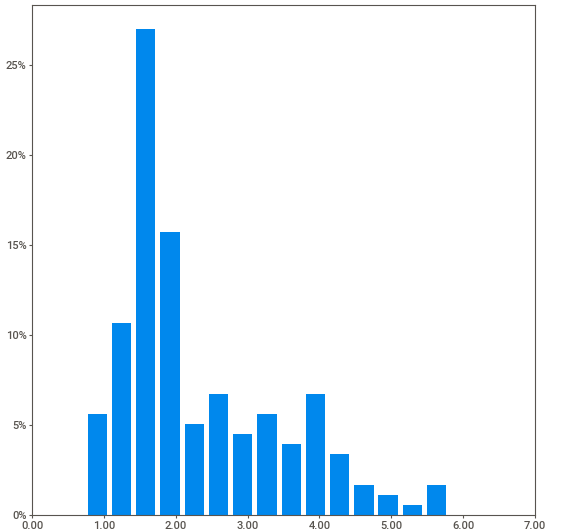
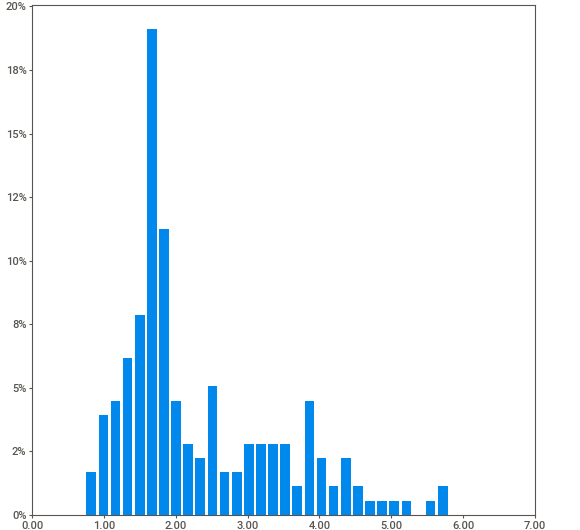
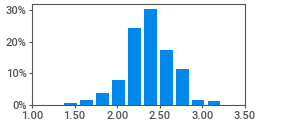
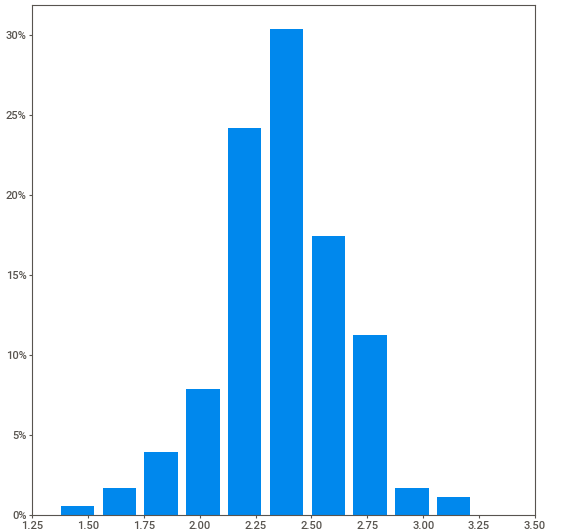
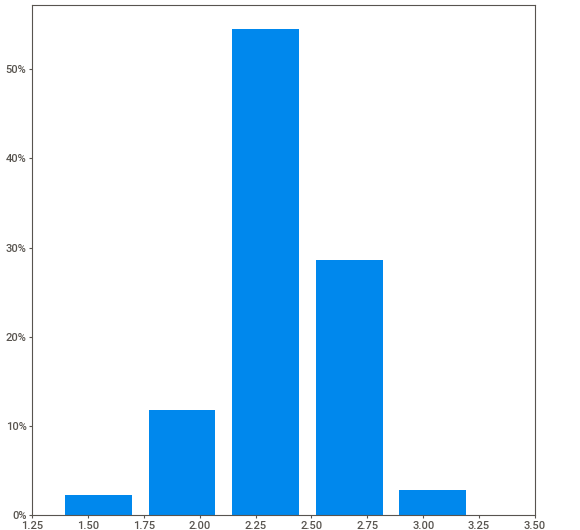
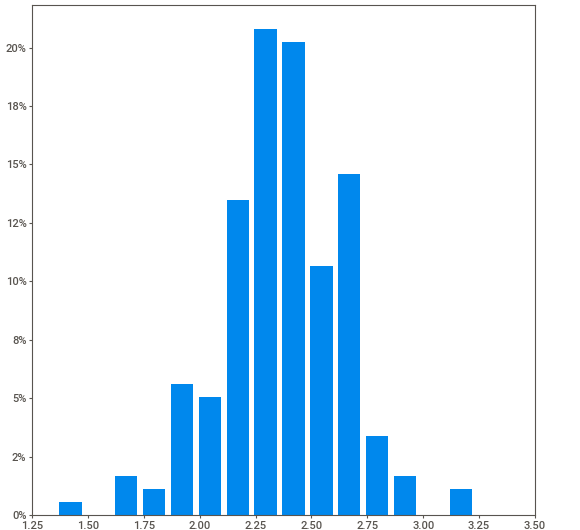
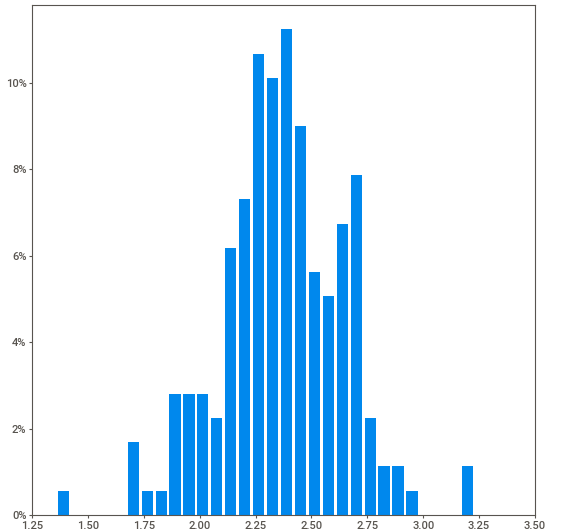
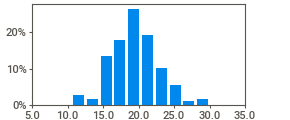
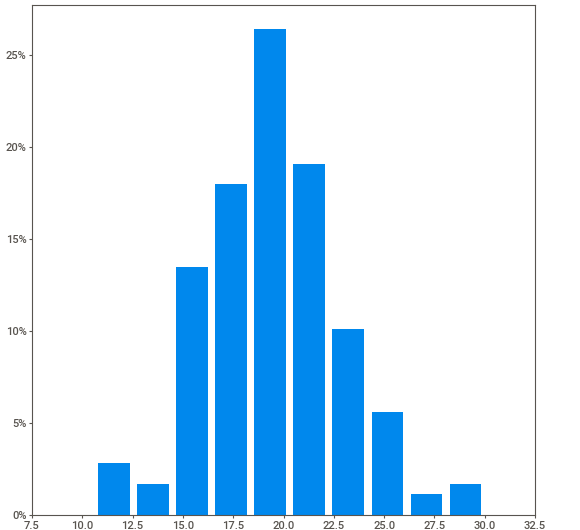
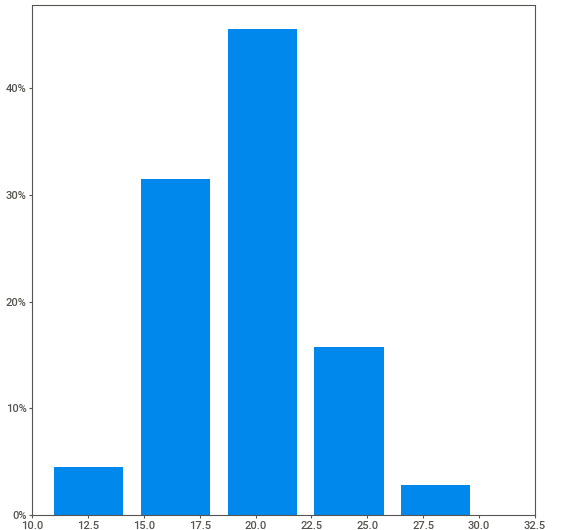
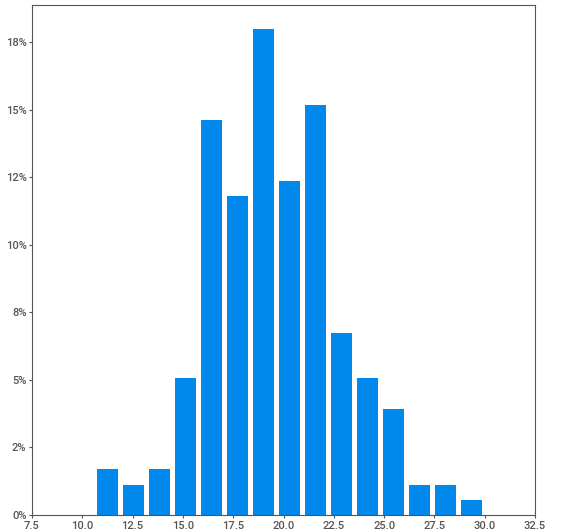
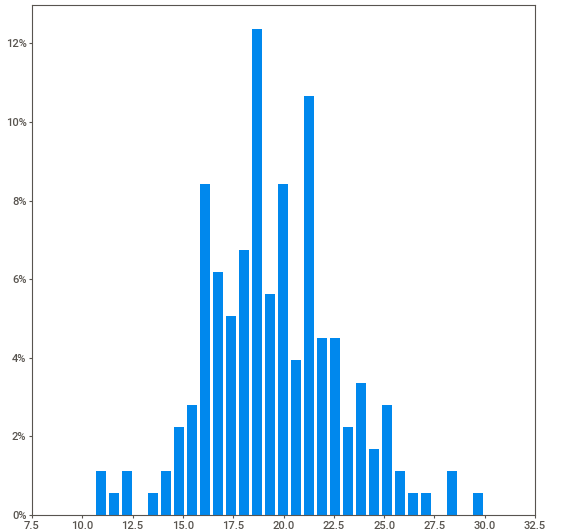
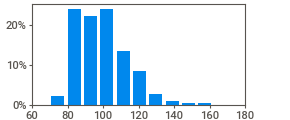
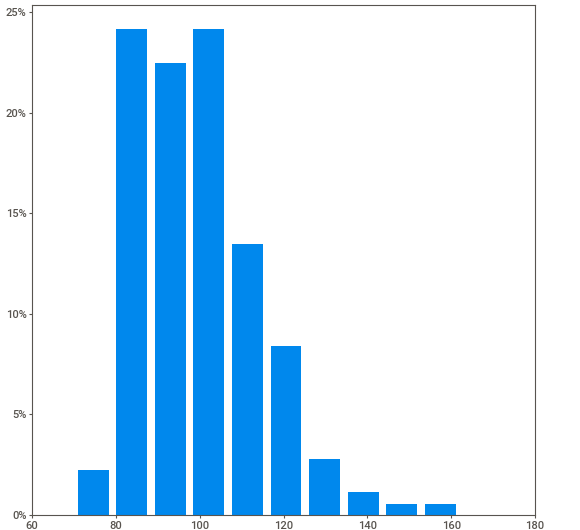
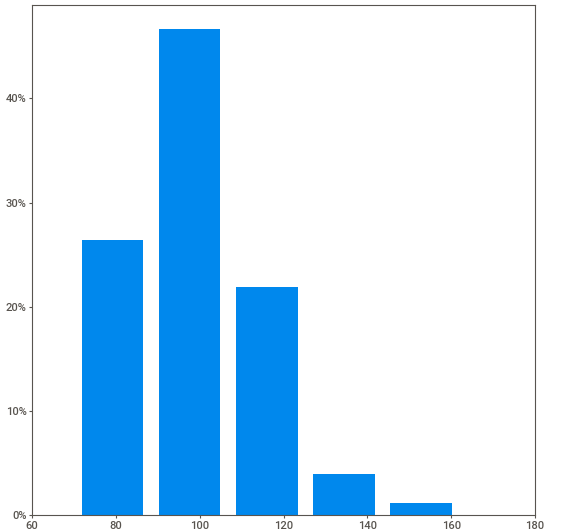
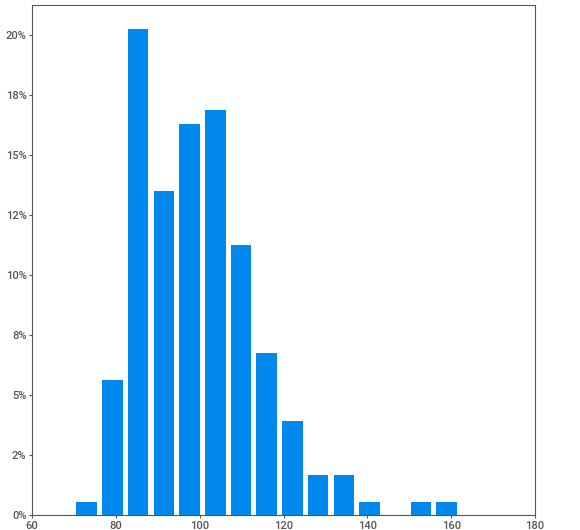
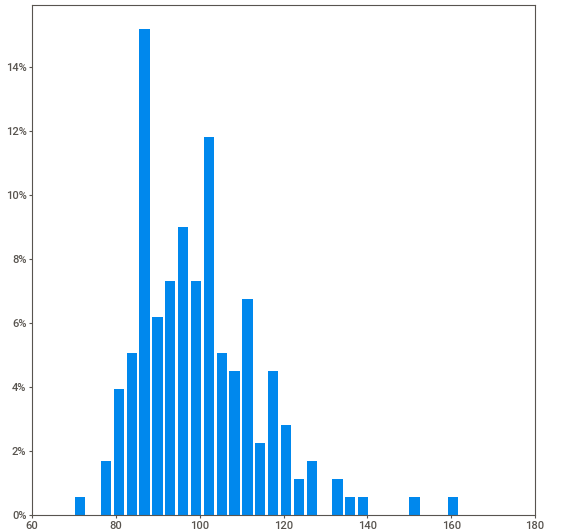
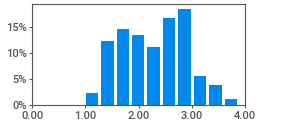
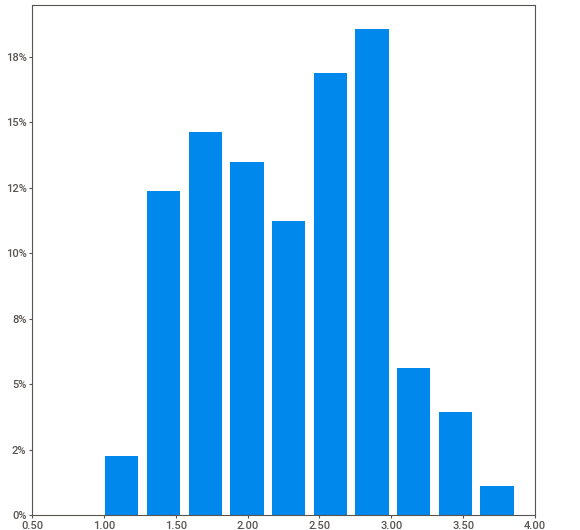
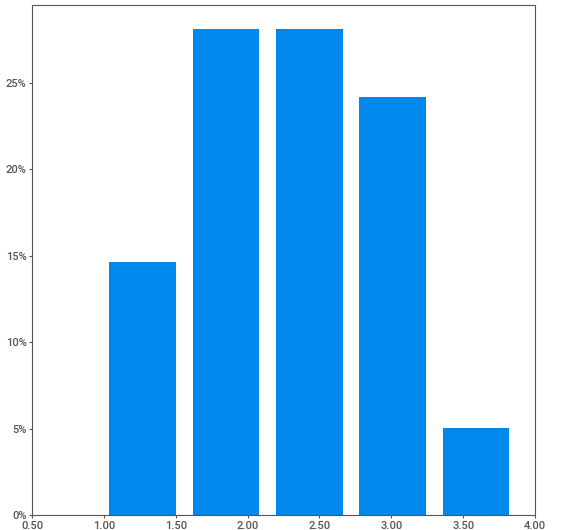
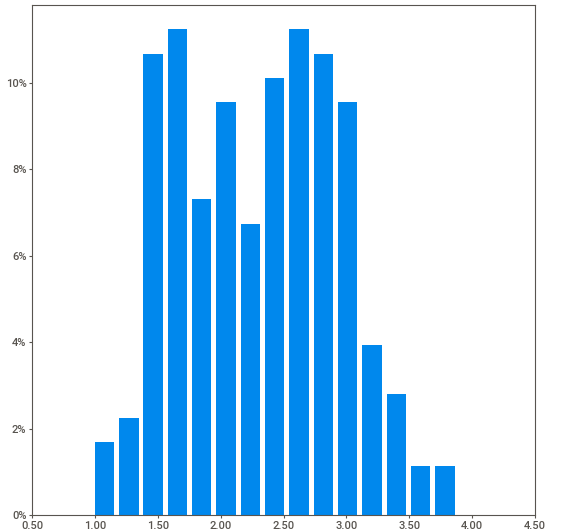
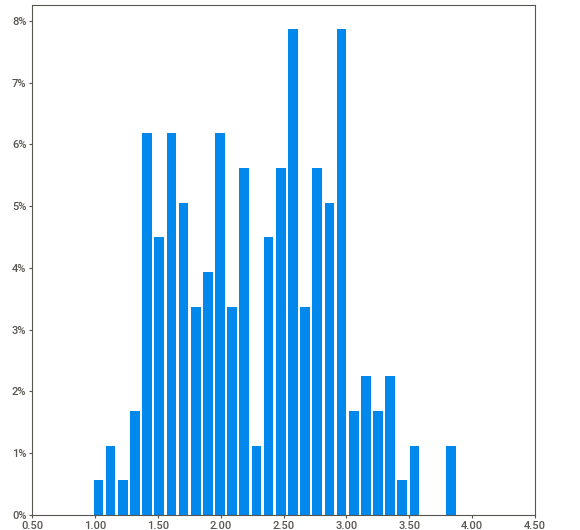
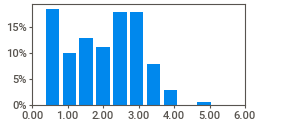
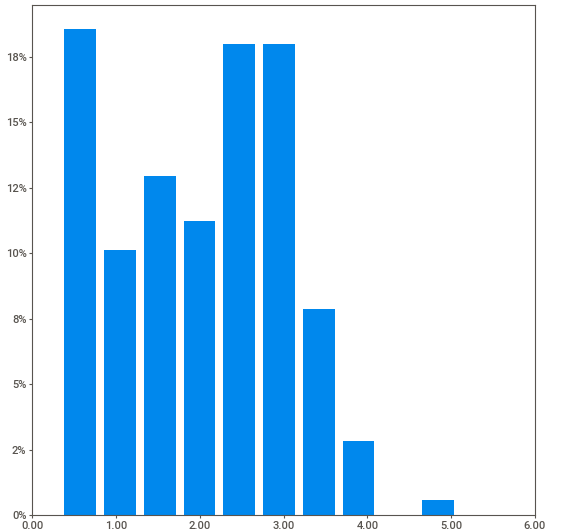
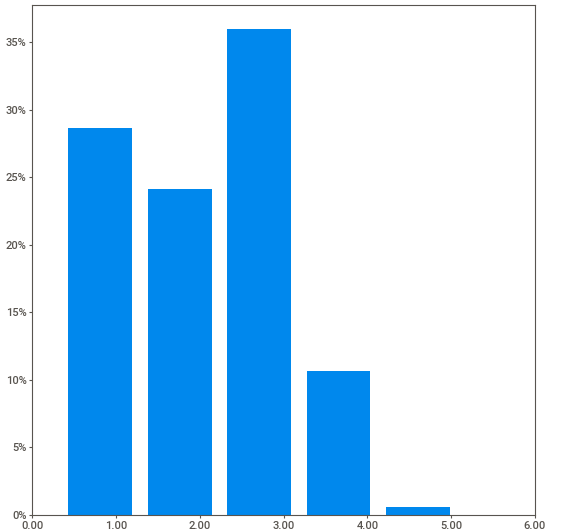
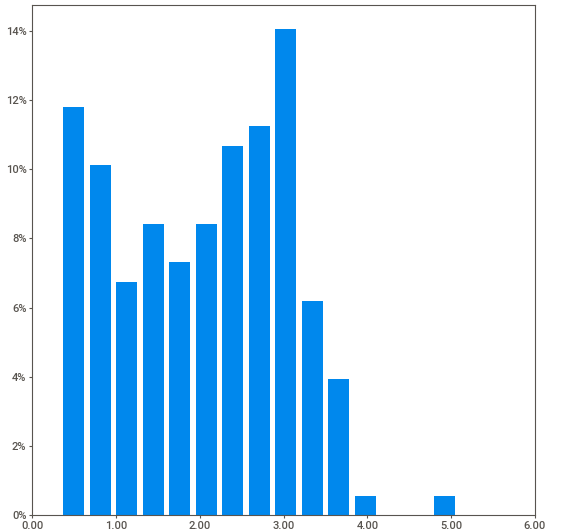
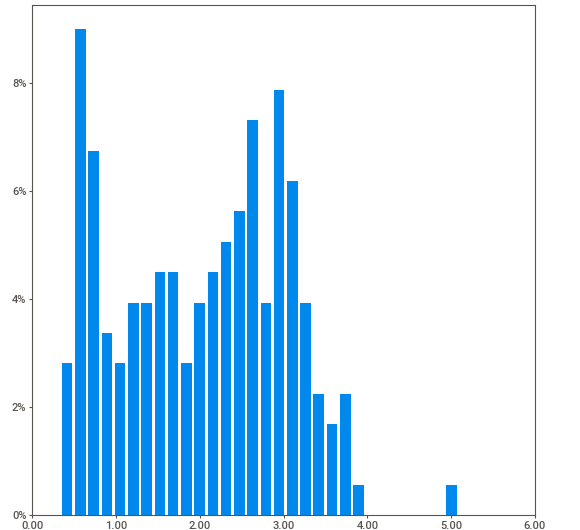
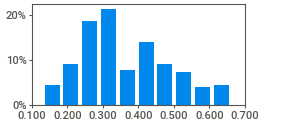
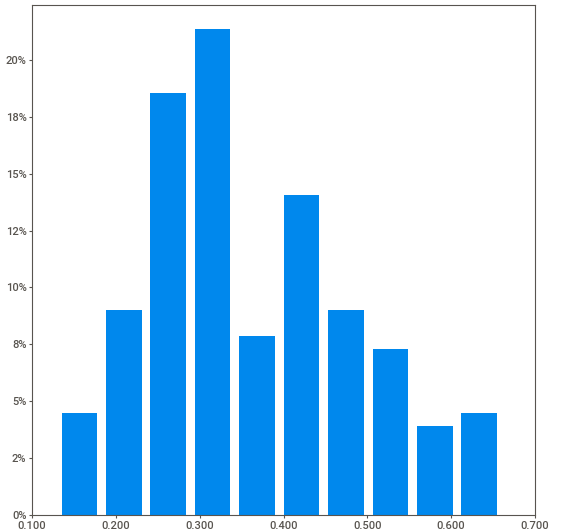
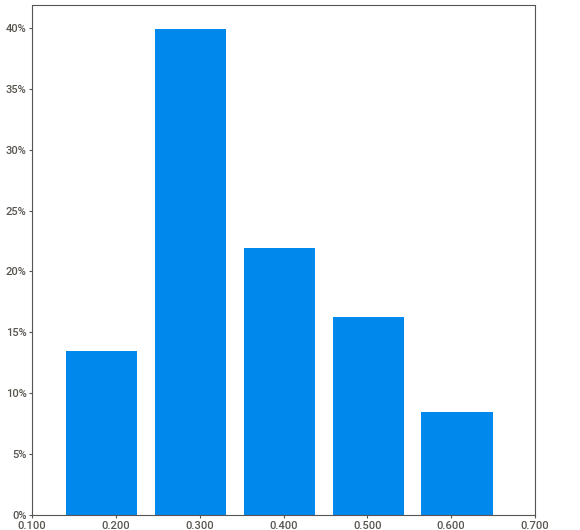
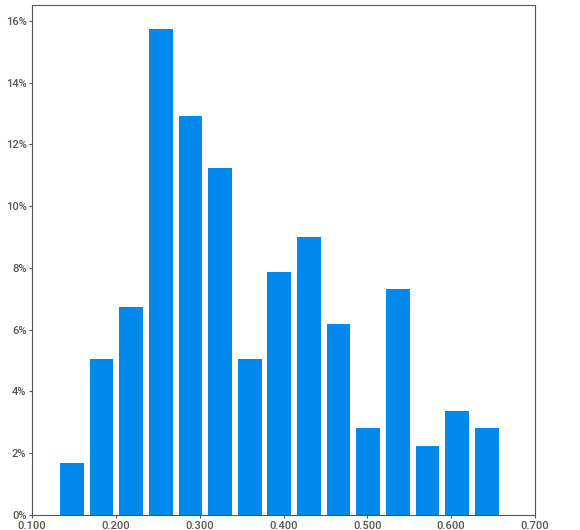
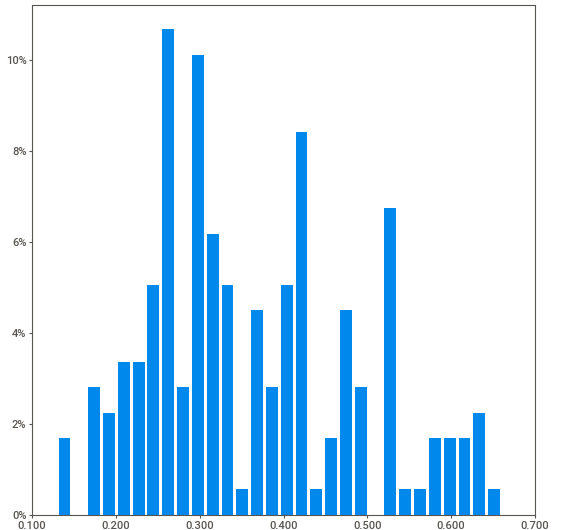
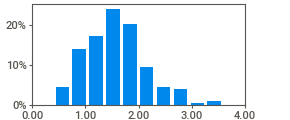
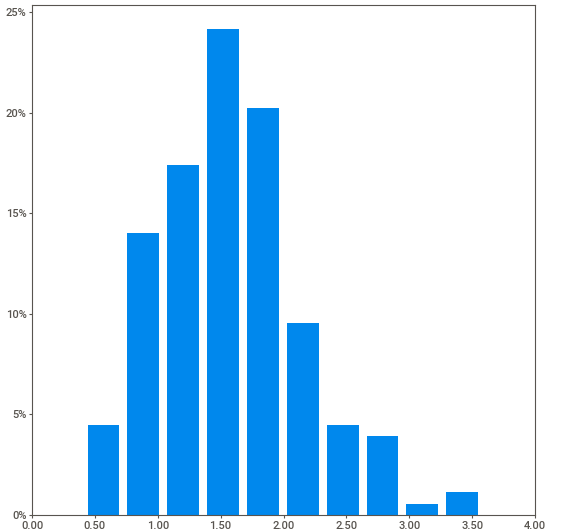
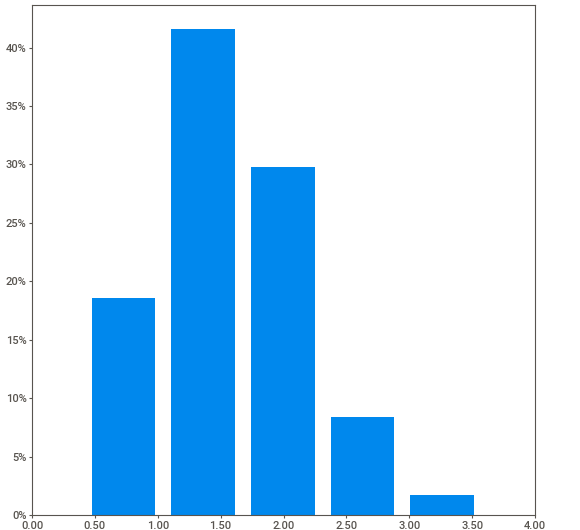
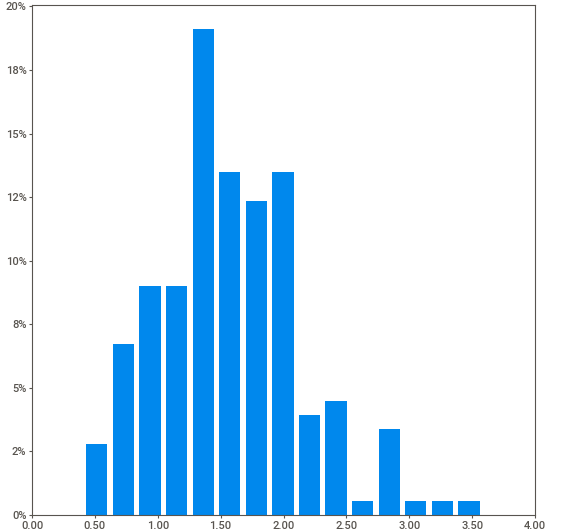
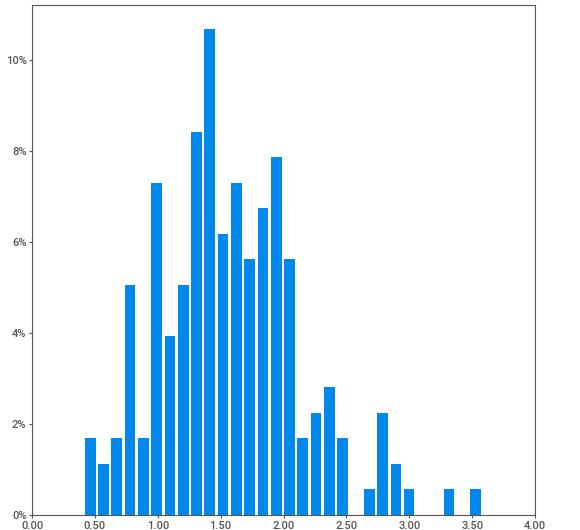
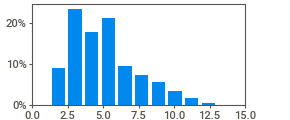
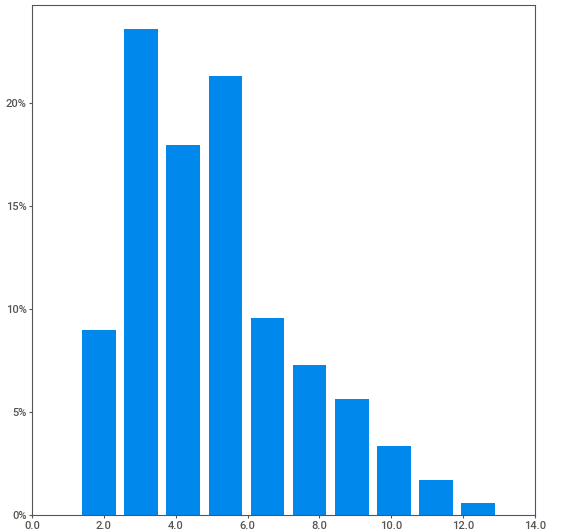
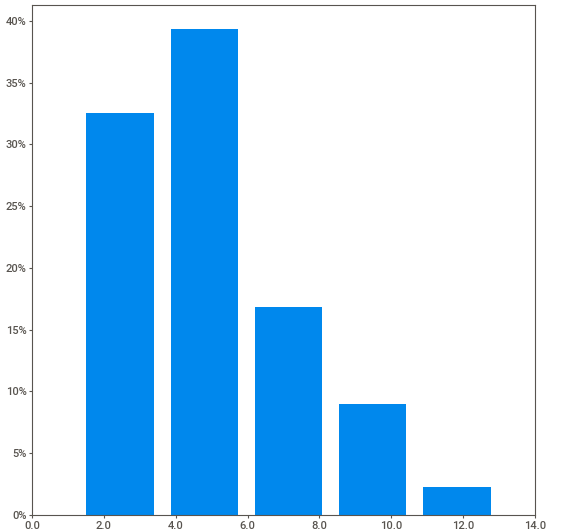
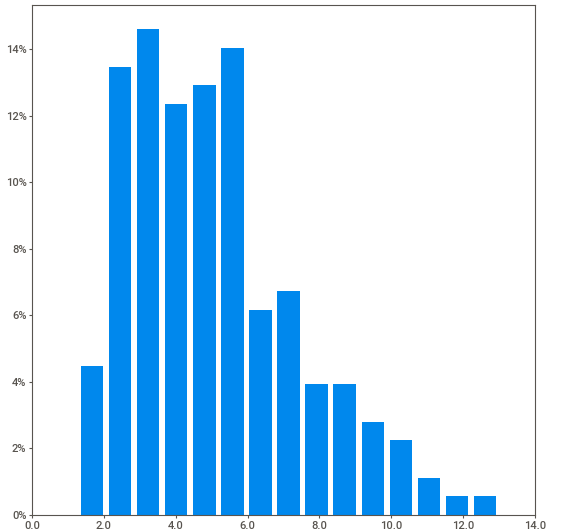
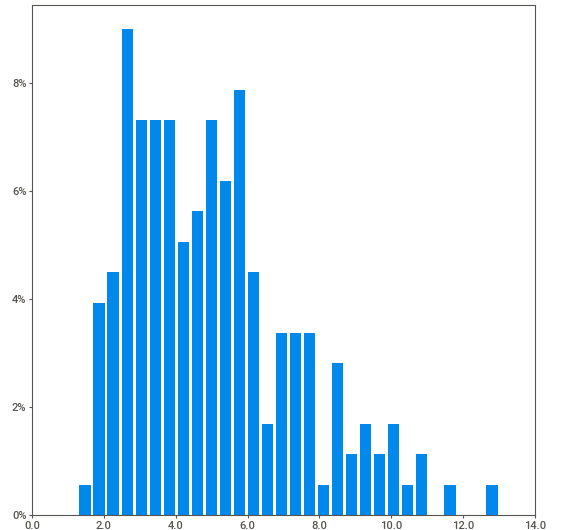
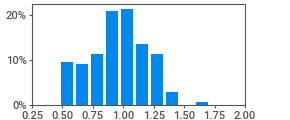
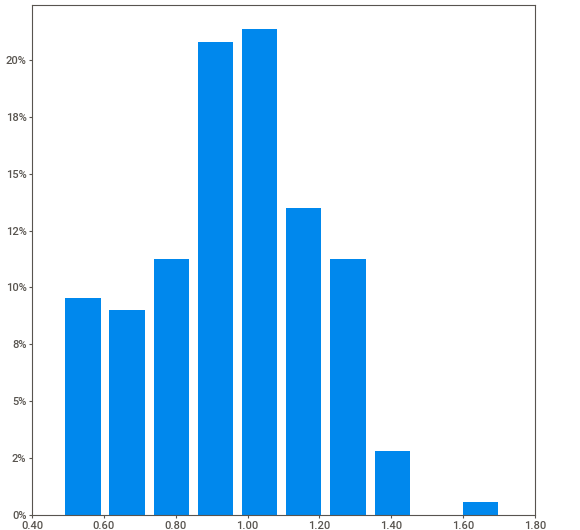
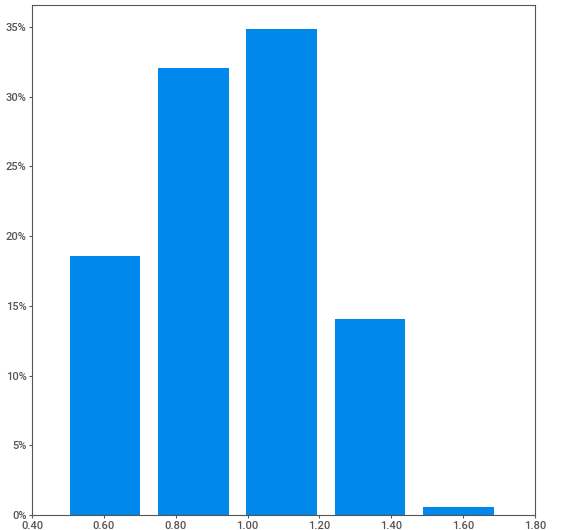
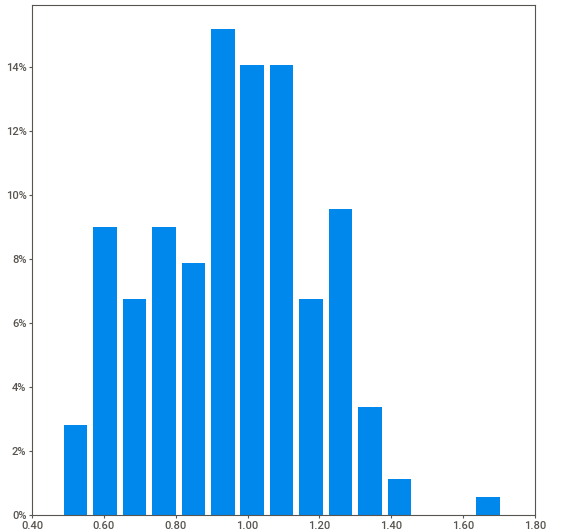
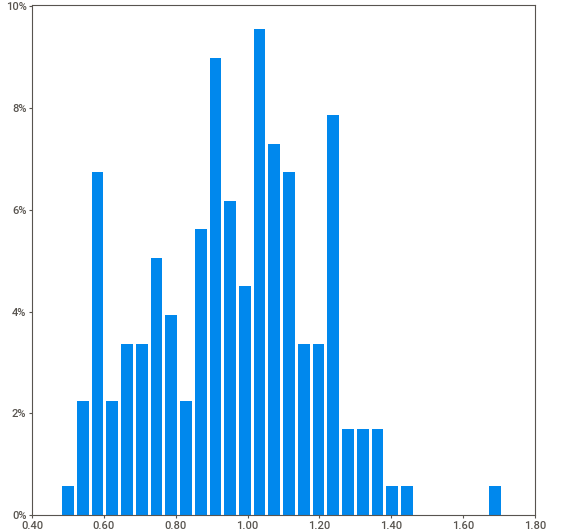
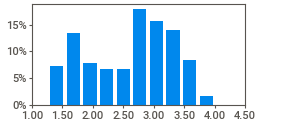
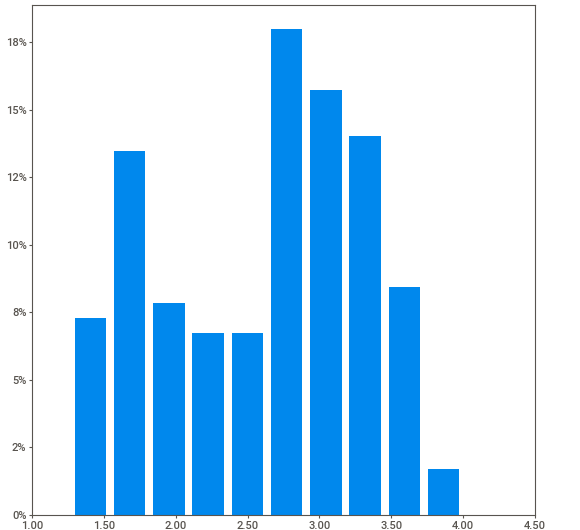
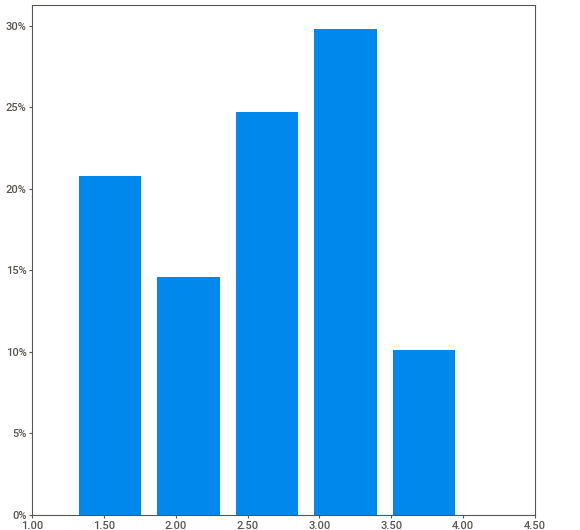
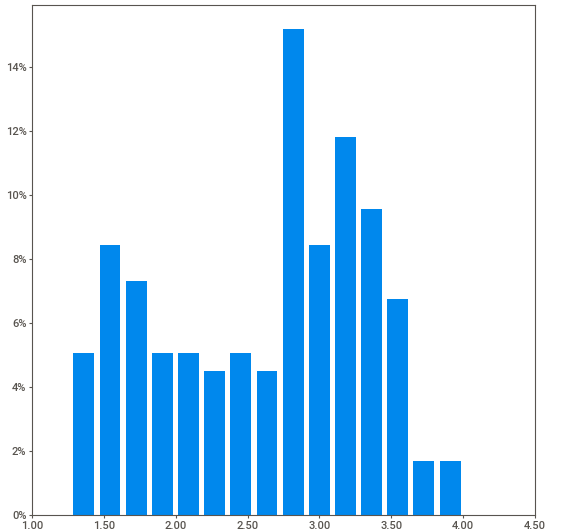
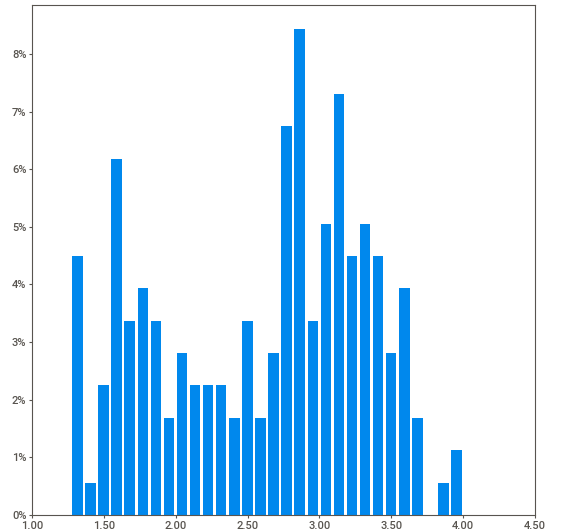
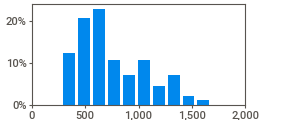
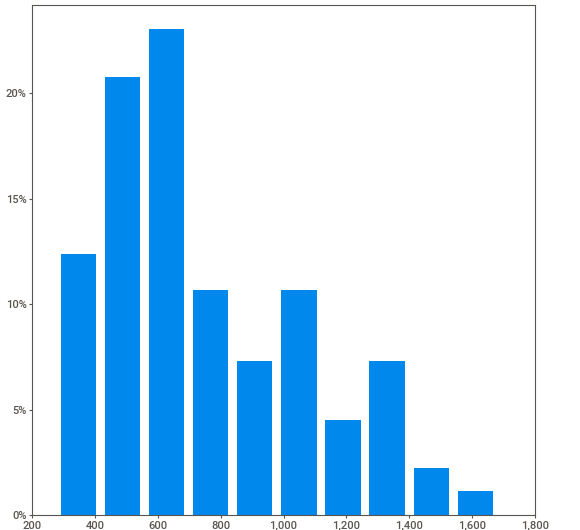
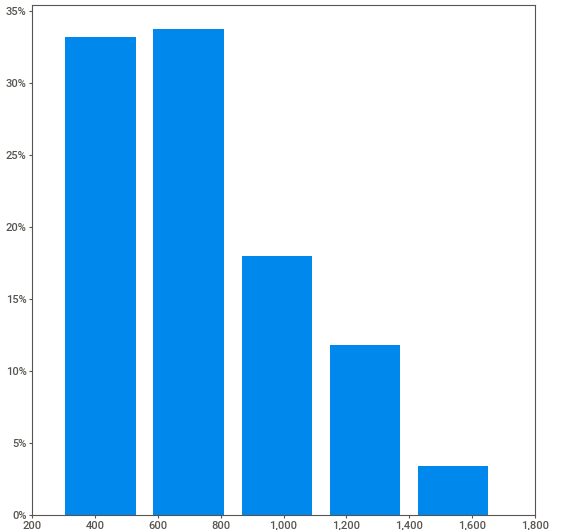
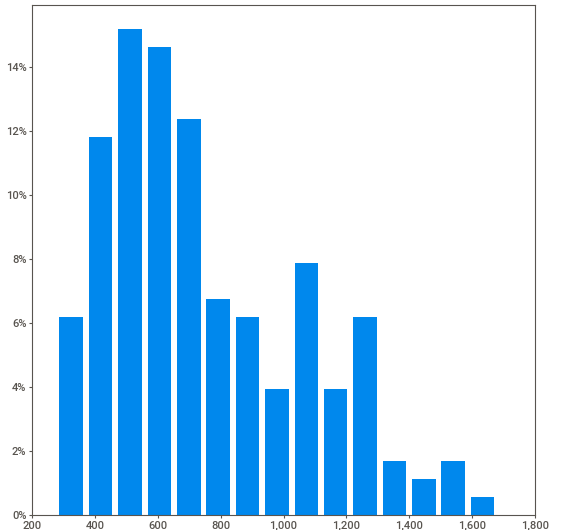
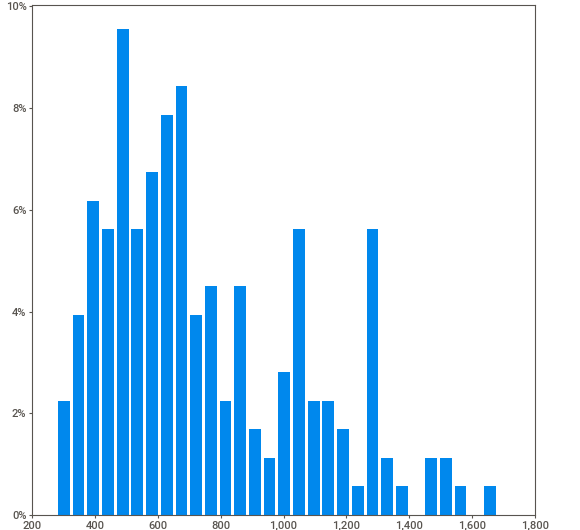
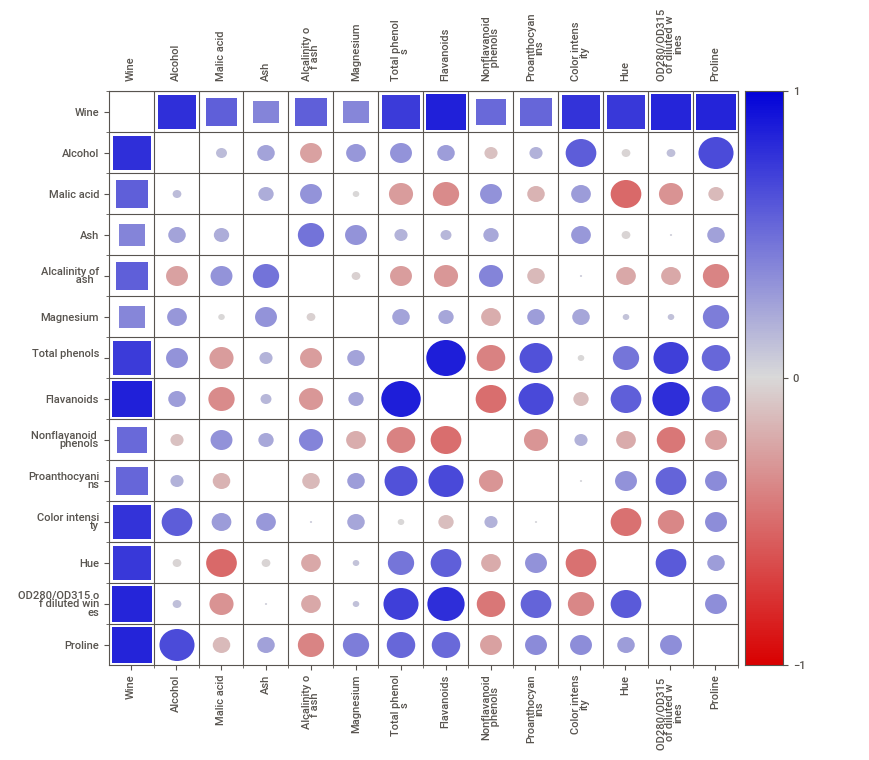
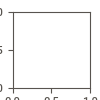

In [14]:
import sweetviz as sv
reporteSweetviz=sv.analyze(dfWine)
reporteSweetviz.show_notebook()

Con el fin de identificar cuales variables son las mas idoneas para hacer clasificacion se explorara la informacion por cada tipo de vino

In [15]:
grouped_data= dfWine.groupby('Wine')
columnas = dfWine.columns
columnas
for key in columnas:
  print('---------------------------------------------------------------')
  print(key)
  print(grouped_data[key].describe(include='all'))
  

---------------------------------------------------------------
Wine
      count  unique  top  freq
Wine                          
1        59       1    1    59
2        71       1    2    71
3        48       1    3    48
---------------------------------------------------------------
Alcohol
      count       mean       std    min     25%     50%     75%    max
Wine                                                                  
1      59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83
2      71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86
3      48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34
---------------------------------------------------------------
Malic acid
      count      mean       std   min     25%    50%     75%   max
Wine                                                              
1      59.0  2.010678  0.688549  1.35  1.6650  1.770  1.9350  4.04
2      71.0  1.932676  1.015569  0.74  1.2700  1.610  2.1450  5.80
3     

Con el fin de validar que tan relacionadas estan las variables por cada tipo de vino se crea matriz de correlaciones

In [16]:
corr_matrix_group = grouped_data.corr(method='pearson')
corr_matrix_group

Alcohol  Malic acid       Ash  \
Wine                                                                
1    Alcohol                       1.000000   -0.040513 -0.148595   
     Malic acid                   -0.040513    1.000000  0.026221   
     Ash                          -0.148595    0.026221  1.000000   
     Alcalinity of ash            -0.318367    0.060031  0.549330   
     Magnesium                     0.159361    0.079317  0.382549   
     Total phenols                 0.420687   -0.083514  0.004802   
     Flavanoids                    0.414904   -0.191278 -0.070454   
     Nonflavanoid phenols          0.015659   -0.089366  0.465901   
     Proanthocyanins               0.307571   -0.080798 -0.145471   
     Color intensity               0.408291   -0.257587 -0.124220   
     Hue                           0.080020   -0.419981  0.239214   
     OD280/OD315 of diluted wines  0.069818    0.173244 -0.081593   
     Proline                       0.360646   -0.372629 -0.029525   
2    Alcohol                       1.000000   -0.021362 -0.214851   
     Malic acid                   -0.021362    1.000000  0.148708   
     Ash                          -0.214851    0.148708  1.000000   
     Alcalinity of ash            -0.056282    0.237923  0.695264   
     Magnesium                    -0.029911   -0.076788  0.129130   
     Total phenols                -0.046321    0.039441  0.112146   
     Flavanoids                   -0.038247    0.111932  0.314937   
     Nonflavanoid phenols         -0.068159    0.127605  0.299757   
     Proanthocyanins              -0.189617    0.210541  0.042955   
     Color intensity               0.269789   -0.203258  0.060247   
     Hue                          -0.002038   -0.407986 -0.031244   
     OD280/OD315 of diluted wines -0.130313    0.157838  0.160590   
     Proline                       0.043174   -0.224214  0.041959   
3    Alcohol                       1.000000    0.110465  0.245078   
     Malic acid                    0.110465    1.000000  0.018057   
     Ash                           0.245078    0.018057  1.000000   
     Alcalinity of ash             0.209946    0.085049  0.758518   
     Magnesium                    -0.084141   -0.174979  0.211286   
     Total phenols                 0.210362   -0.160717  0.470437   
     Flavanoids                    0.076087   -0.281573  0.277110   
     Nonflavanoid phenols          0.038158    0.142758 -0.020370   
     Proanthocyanins               0.376559   -0.223447  0.193835   
     Color intensity               0.350378   -0.162205  0.125153   
     Hue                          -0.034147    0.079707  0.180470   
     OD280/OD315 of diluted wines  0.132150    0.007206  0.225396   
     Proline                      -0.089051    0.002909 -0.147298   

                                   Alcalinity of ash    Magnesium  \
Wine                                                                
1    Alcohol                                 -0.318367   0.159361   
     Malic acid                               0.060031   0.079317   
     Ash                                      0.549330   0.382549   
     Alcalinity of ash                        1.000000   0.238337   
     Magnesium                                0.238337   1.000000   
     Total phenols                           -0.222999   0.307241   
     Flavanoids                              -0.287103   0.123332   
     Nonflavanoid phenols                     0.302262   0.237248   
     Proanthocyanins                         -0.173628  -0.059042   
     Color intensity                         -0.210951   0.184661   
     Hue                                      0.092980  -0.111386   
     OD280/OD315 of diluted wines            -0.117704   0.120651   
     Proline                                 -0.122436  -0.147912   
2    Alcohol                                 -0.056282  -0.029911   
     Malic acid                               0.237923  -0.076788   
     Ash                         

Para identificar la diferencia de los atributos por cada tipo de vino realizamos lo siguiente:

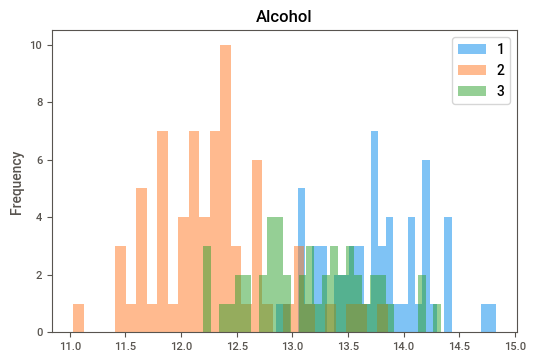

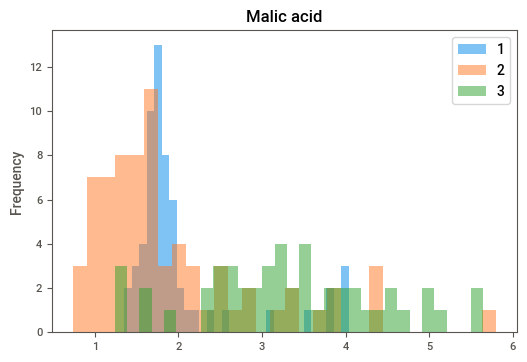

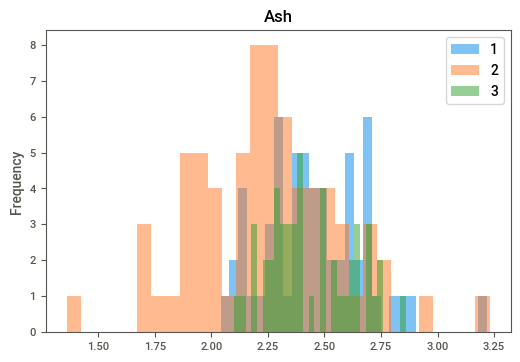

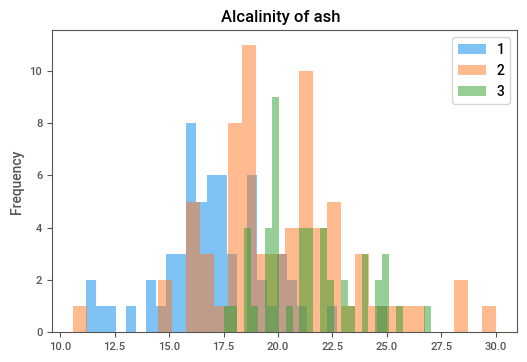

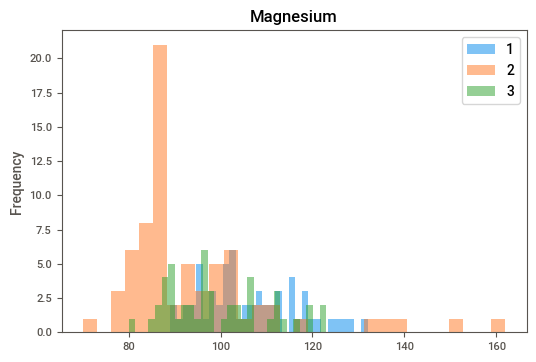

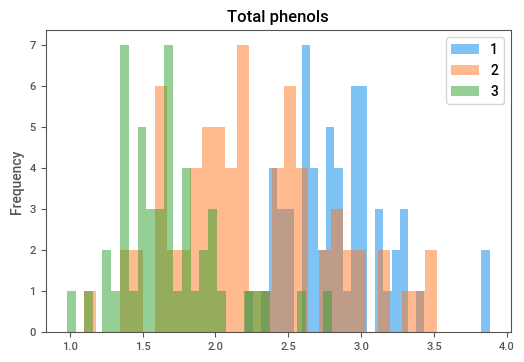

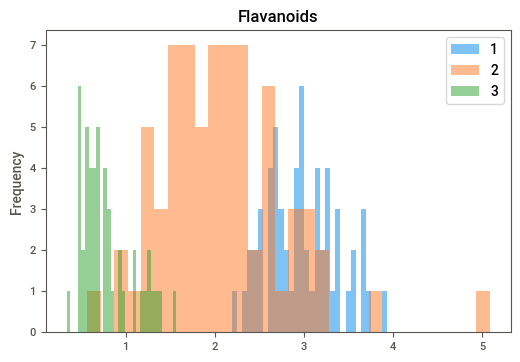

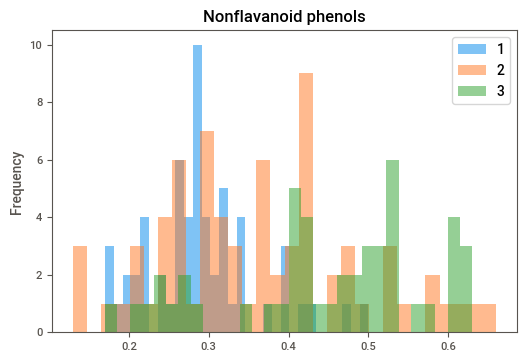

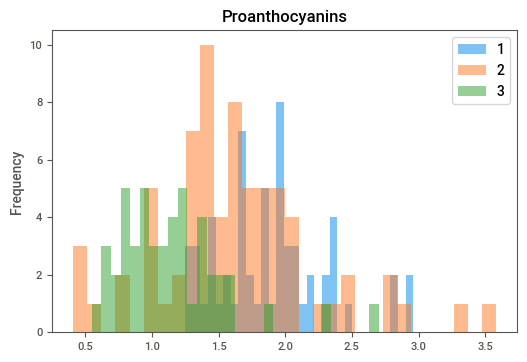

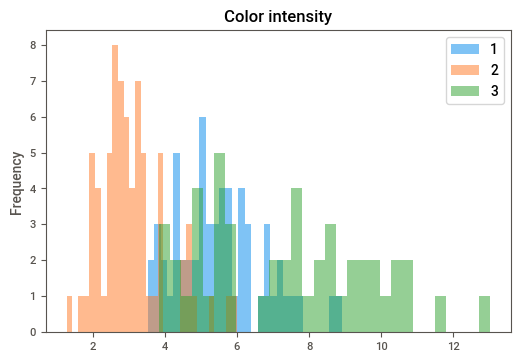

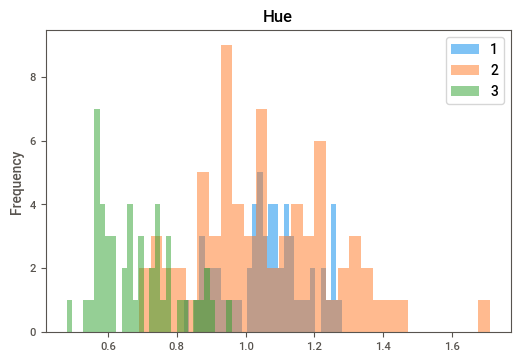

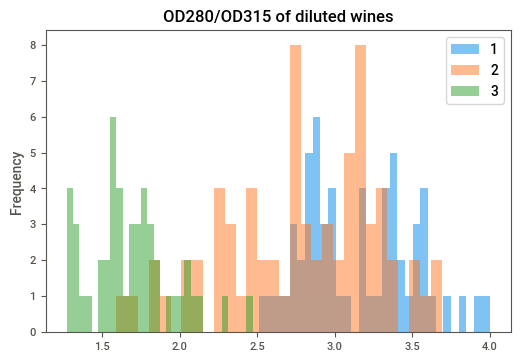

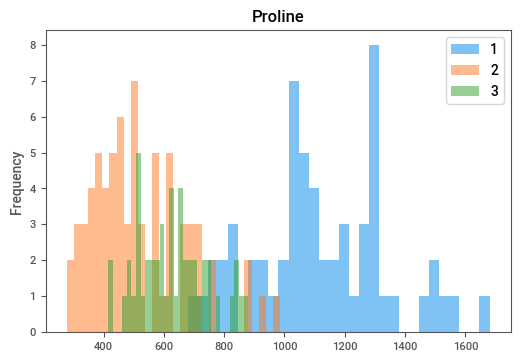

In [17]:

#Tipos de vino
TypeWine= dfWine['Wine'].unique()
TypeWine
#dfWine.columns[1:]
for key in ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash  ', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']:
        plt.figure()
        for tipo in TypeWine:
            dfWine[key][dfWine['Wine']==tipo].plot.hist(alpha=0.5, bins=30)
        plt.title(key)
        plt.legend(TypeWine)
plt.show()

Teniendo en cuenta el analisis previo de dato: Analisis de datos atipicos y faltantes, correlaciones e independencia entre variables, se toma la decision de usar las variables para entrenar y evaluar el modelo:
- Alcohol
- Flavanoids
- Total phenols
- OD280/OD315 of diluted wines  



In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X = dfWine[['Alcohol', 'Flavanoids', 'Total phenols','OD280/OD315 of diluted wines']].to_numpy()
y=lb.fit_transform(dfWine['Wine'])

Se generan los dataset de entrenamiento y prueba, de acuerdo a las variables elegidas para crear el modelo

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=2294)

**Modeling**


Se entrenan 4 modelos con el fin de evaluar cual es que mejor se ajusta

In [20]:
from sklearn.linear_model import LogisticRegression
models = [sklearn.naive_bayes.GaussianNB(),
                DecisionTreeClassifier(random_state=0),
                LogisticRegression(multi_class='multinomial',solver='newton-cg'),
                SVC(kernel='linear', probability=True)]

for model in models:
  model.fit(X_train, y_train)
  print(model.get_params())

{'priors': None, 'var_smoothing': 1e-09}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Modelos entrenados

In [21]:
models

[GaussianNB(),
 DecisionTreeClassifier(random_state=0),
 LogisticRegression(multi_class='multinomial', solver='newton-cg'),
 SVC(kernel='linear', probability=True)]

Validacion de prediccion con datos de entrenamiento

In [22]:
for model in models:
    plt.figure()
  #  visual(model,X_train,y_train,'SVC with linear kernel')
    TypeWine= TypeWine.astype('string')
    print("----------------------------------------------------------------")
    print(model)
    print(classification_report(y_train, model.predict(X_train), target_names='Vino Tipo ' + TypeWine.astype('string')))

----------------------------------------------------------------
GaussianNB()
              precision    recall  f1-score   support

 Vino Tipo 1       0.93      0.95      0.94        44
 Vino Tipo 2       0.96      0.85      0.90        54
 Vino Tipo 3       0.88      1.00      0.93        35

    accuracy                           0.92       133
   macro avg       0.92      0.94      0.93       133
weighted avg       0.93      0.92      0.92       133

----------------------------------------------------------------
DecisionTreeClassifier(random_state=0)
              precision    recall  f1-score   support

 Vino Tipo 1       1.00      1.00      1.00        44
 Vino Tipo 2       1.00      1.00      1.00        54
 Vino Tipo 3       1.00      1.00      1.00        35

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

--------------------------------------------------------

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Grafica de Decision Tree

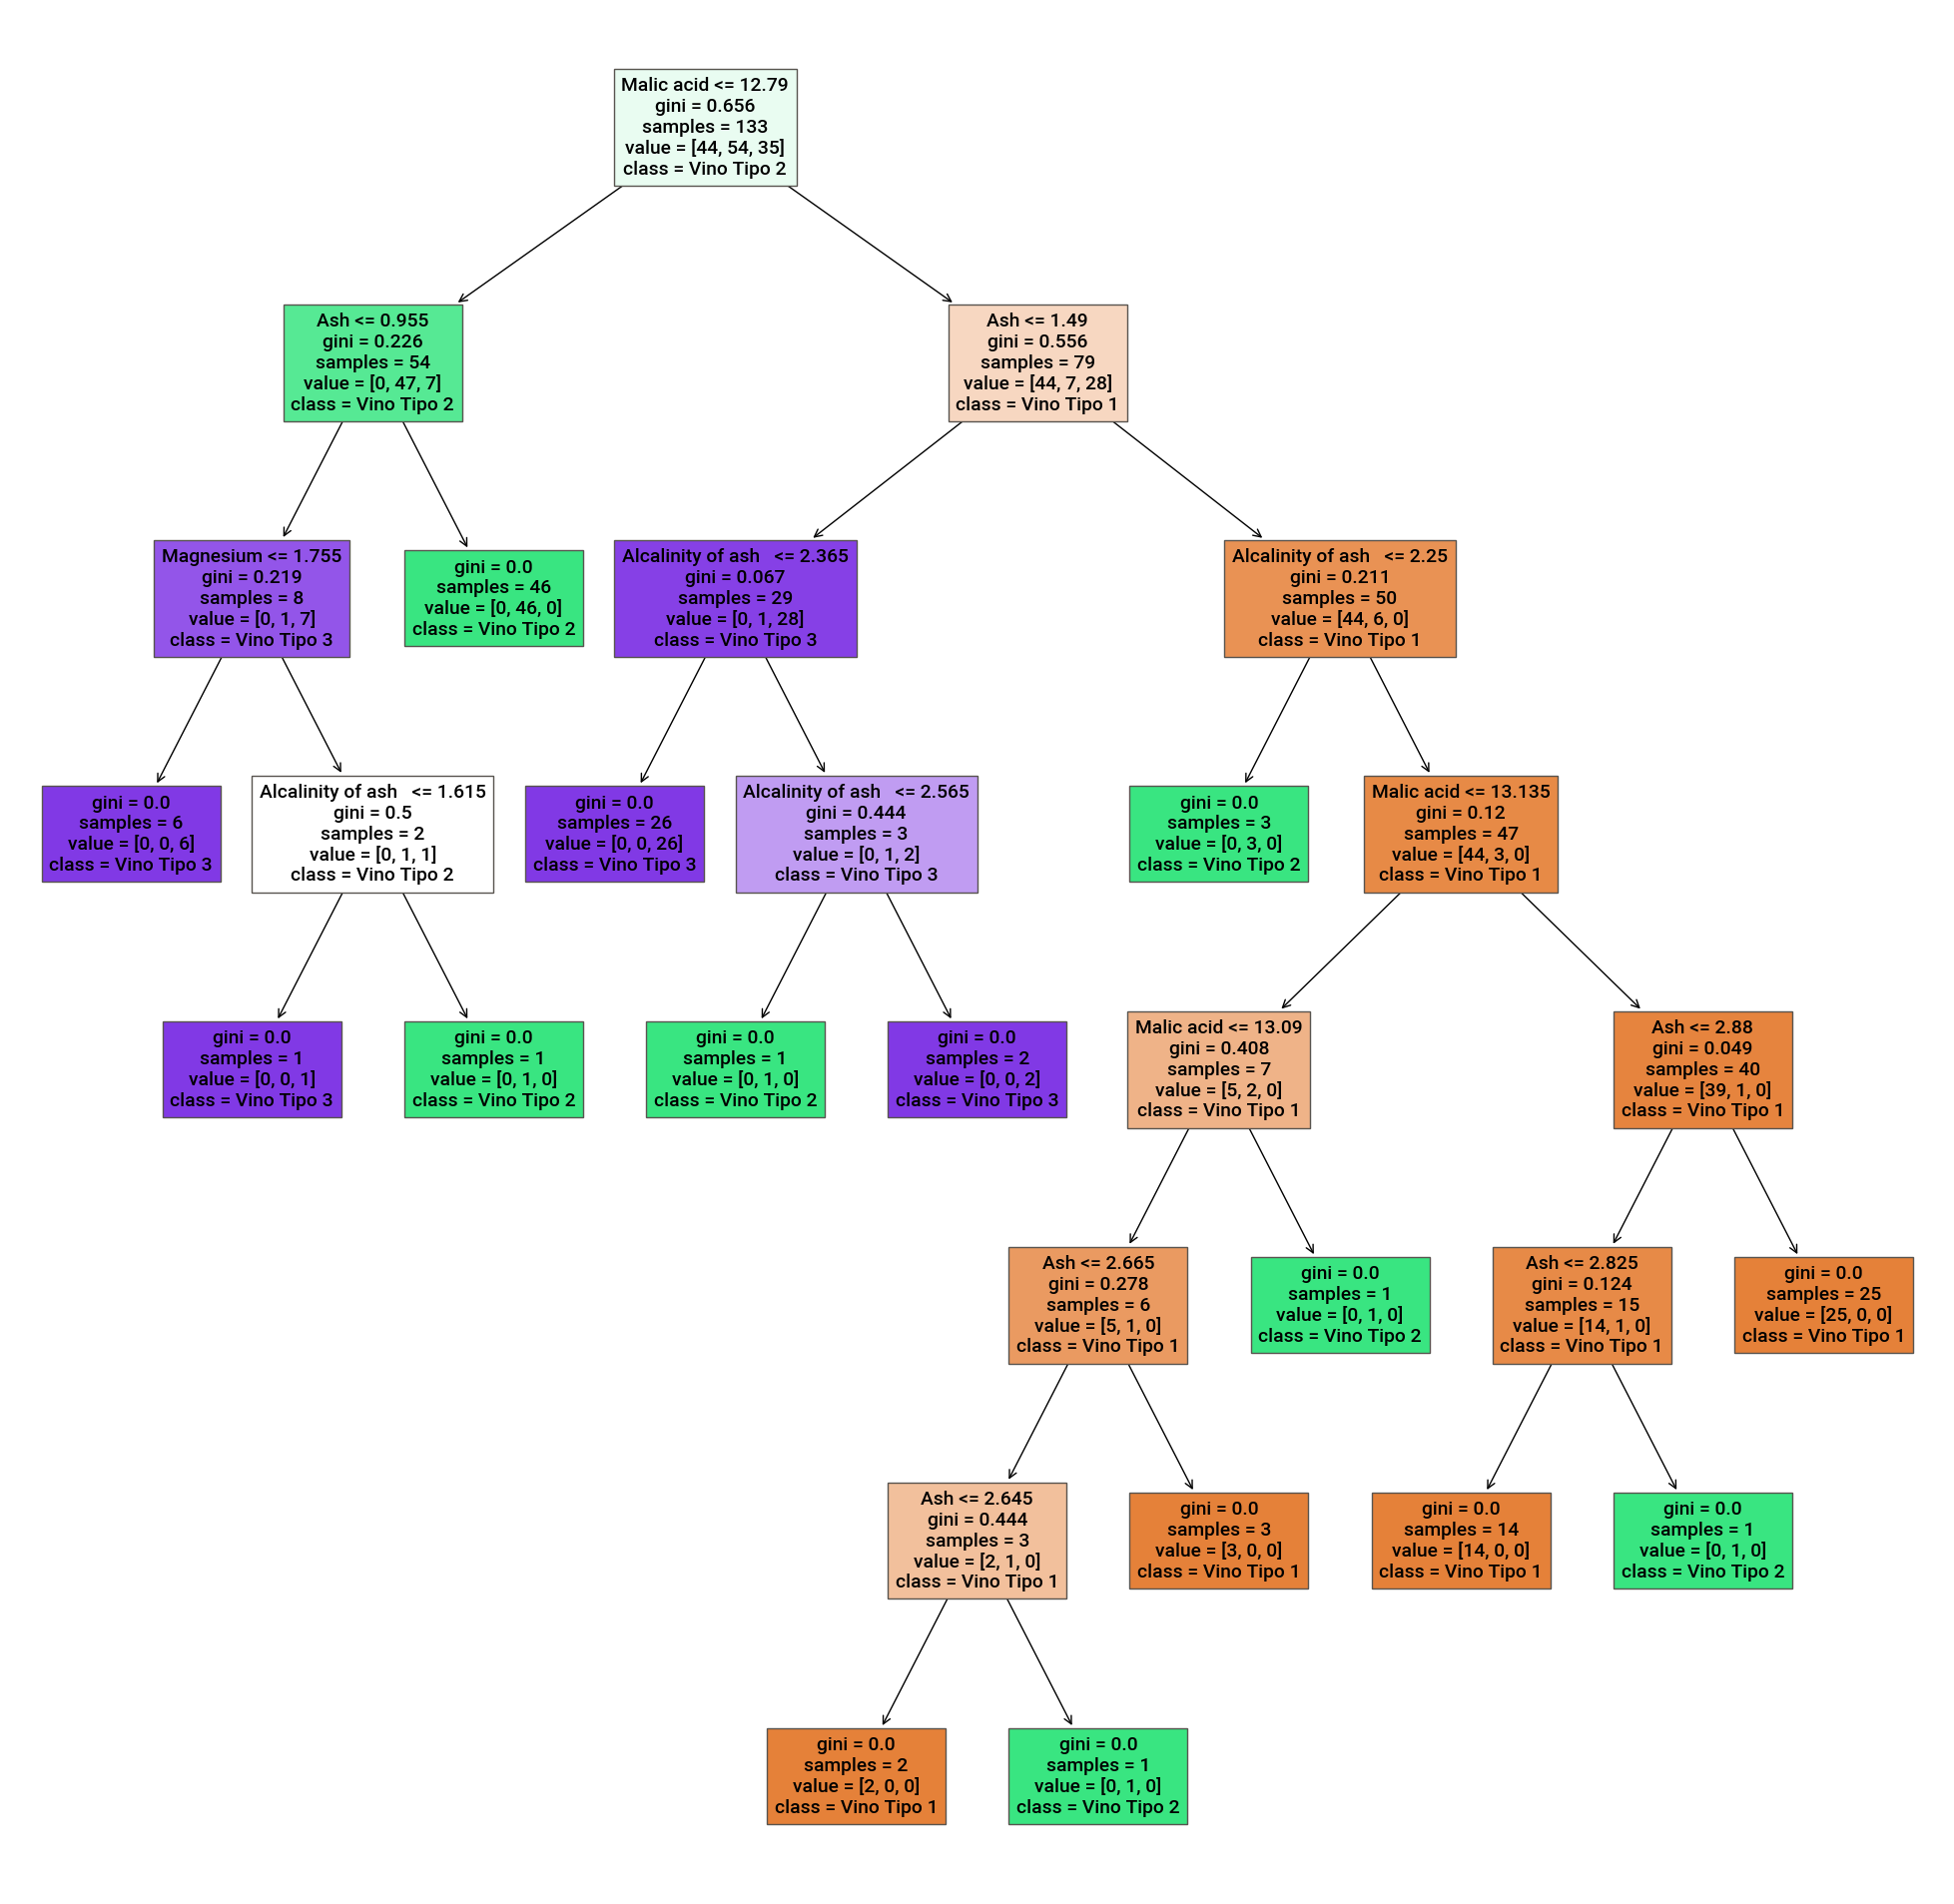

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
fig = plt.figure(figsize=(25,25))
_ =tree.plot_tree(clf,
                  feature_names=['Malic acid', 'Ash', 'Alcalinity of ash  ', 'Magnesium',
                    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                    'Proanthocyanins', 'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline','Alcohol'],
                  class_names= 'Vino Tipo ' + TypeWine.astype('string'),
                  filled=True)



Con el fin de identificar cual es el mejor modelo se realiza la siguiente comparacion:

Nota: teniendo en cuenta que solo existen 178 registros, se usara el metodo de validacion cruzada.

Teniendo en cuenta el target y el objetivo del negocio se toma la decision de evaluar los modelos con el evaluador de exactitud

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['accuracy',
  'balanced_accuracy',
  'top_k_accuracy',
  'average_precision',
  'neg_brier_score',
  'f1',
  'f1_micro',
  'f1_macro',
  'f1_weighted',
  'f1_samples',
  'neg_log_loss',
  'precision',
  'precision_micro',
  'precision_macro',
  'precision_weighted',
  'precision_samples' 
  'recall',
  'recall_micro',
  'recall_macro',
  'recall_weighted',
  'recall_samples' 
  'jaccard',
  'jaccard_micro',
  'jaccard_macro',
  'jaccard_weighted',
  'jaccard_samples' 
  'roc_auc',
  'roc_auc_ovr',
  'roc_auc_ovo',
  'roc_auc_ovr_weighted',
  'roc_auc_ovo_weighted']

names=['Naive bayes','Decision tree','Logistic','SVM','RandomForest']
models=[sklearn.naive_bayes.GaussianNB(),
                DecisionTreeClassifier(random_state=0),
                LogisticRegression(multi_class='multinomial',solver='newton-cg'),
                SVC(kernel='linear', probability=True)]

for reg,name in zip(models,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[0],
                            cv=5)
    print('--------------------------------------')
    print('Model {0:20} | score {1:20}'.format(name,scoring[0]))
    print(scores)
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:10.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

--------------------------------------
Model Naive bayes          | score accuracy            
[0.85185185 0.92592593 0.92592593 0.92307692 0.96153846]
mean                   0.92| std   0.04                  
Accuracy(95.7%):       0.92 (+/- 0.07)
--------------------------------------
Model Decision tree        | score accuracy            
[0.77777778 0.85185185 0.85185185 0.92307692 0.84615385]
mean                   0.85| std   0.05                  
Accuracy(95.7%):       0.85 (+/- 0.09)
--------------------------------------
Model Logistic             | score accuracy            
[0.88888889 0.88888889 0.92592593 0.92307692 0.88461538]
mean                   0.90| std   0.02                  
Accuracy(95.7%):       0.90 (+/- 0.04)
--------------------------------------
Model SVM                  | score accuracy            
[0.85185185 0.92592593 0.88888889 0.92307692 0.88461538]
mean                   0.89| std   0.03                  
Accuracy(95.7%):       0.89 (+/- 0.05)


Teniendo en cuenta los resultados de la validacion cruzada, identificamos que el mejor modelo es SVC

Definicion de subrutina para crear matriz confusión

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
def mostrarResultados(clf,x_test,y_test,title):
    #score de la respuesta
    print('mean accuracy on the given test data')
    print(clf.score(x_test,y_test))

    # matrix de confusion con todos los datos
    y_estimado=clf.predict(x_test)
    print('Confusion matrix')
    m=confusion_matrix(y_estimado, y_test)
    print(m)
    disp = ConfusionMatrixDisplay(confusion_matrix=m,display_labels=('Vino Tipo ' + TypeWine.astype('string')))
    disp.plot()   

    #cuales indicen dan valor diferente
    print (title)
    print ('index of fail data')
    indices=np.where(((y_test)!=(y_estimado)))
    print(indices)
    print ('real values:')
    print (y_test[indices])
    print ('estimated values:')
    print (y_estimado[indices])
    print ('probabilidad de salida(%%):')
    # esta funcion me dice la probabilidad de cada clase de salida
    
    print(np.rint(clf.predict_proba(x_test[indices])*100))
    print ('output=0  \t   output=1  \t  output=2')

    print('which inputs failed?')
    print(x_test[indices])

In [26]:
models

[GaussianNB(),
 DecisionTreeClassifier(random_state=0),
 LogisticRegression(multi_class='multinomial', solver='newton-cg'),
 SVC(kernel='linear', probability=True)]

#Evaluacion de modelo

Matriz de confusion con datos de prueba de acuerdo al modelo seleccionado

mean accuracy on the given test data
0.9333333333333333
Confusion matrix
[[14  2  0]
 [ 1 15  0]
 [ 0  0 13]]
SVM
index of fail data
(array([12, 17, 37]),)
real values:
[0 1 1]
estimated values:
[1 0 0]
probabilidad de salida(%%):
[[25. 74.  2.]
 [64. 35.  0.]
 [45. 55.  0.]]
output=0  	   output=1  	  output=2
which inputs failed?
[[13.05  2.43  2.45  2.51]
 [12.99  2.89  3.3   3.5 ]
 [11.56  5.08  3.18  3.69]]


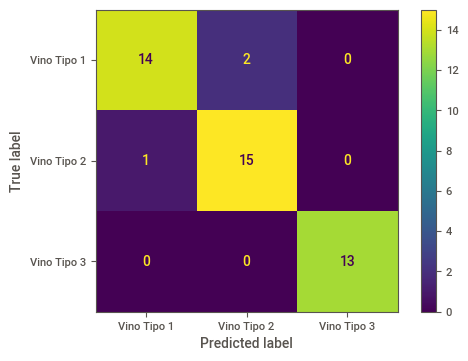

In [27]:

best=3
clf=models[best].fit(X_train, y_train)
mostrarResultados(clf,X_test,y_test,names[best])

Evaluacion de prediccion del modelo con datos de prueba

In [28]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.94      0.88      0.91        17
           2       1.00      1.00      1.00        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



**¿Cuales serian las mejores variables de entrada para hacer clasificación y porque?**
 
Teniendo en cuenta el analisis previo de datos: Analisis de datos atipicos y faltantes, correlaciones e independencia entre variables, se toma la decision de usar las siguientes variables para entrenar y evaluar el modelo:
- Alcohol
- Flavanoids
- Total phenols
- OD280/OD315 of diluted wines  

Analisis de datos atipicos y faltantes: Las variables elegidas no presentaban datos atipicos y faltantes

Correlaciones: Las variables elegidas son las mas significativas para el modelo lo cual permite omitir las variables que no aportarian información 

Adicionalmente las variables cuyos valores se traslapaban en menor cantidad  en los histogramas individuales de acuerdo al tipo de vino, nos indican que es una variable que podria apoyar la clasificación 

**¿Que otras fuentes de información utilizará  para mejorar la predicción realizada?**

- Mediciones de campo 
- Validacion de expertos


**Que transformaciones requiere realizar sobre los datos**

- Cambiar tipos de dato  (Datos categoricos)
- Validación de datos atípicos y faltantes
- Almacenamiento de datos
 
**Que metodo sería el mas conveniente? por que?** 

Para apoyar el analisis y definir cual era el mejor modelo se uso el metodo de validacion cruzada, teniendo en cuenta que solo contabamos con 178 registros. En dicho metodo se evaluó la exactitud de 4 modelos de clasificacion, que nos permitio elegir el modelo SVC (Support Vector Classification), dado que presentaba el mayor porcentaje de exactitud.
 
**Cuál es el mejor indicador de desempeño del clasificador de acuerdo a la logica del negocio?**

Se tomo la decisión de tomar el evaluador de Exactitud ya que en la visual del negocio es importante clasificar los vinos correctamente y esta metrica nos evalua el numero de elementos clasificados correctamente en comparacion con el numero total de registros.
 
**Alguna implicación etica sobre las decisiones que estaria tomando este clasificador?**

En caso de que un vino sea mal clasificado por el modelo podriamos estar comercializando de manera injusta de acuerdo a las espectativas de los consumidores. Adicionalmente para los proveedores y fabricantes implicaria unos costos que no estarian acorde a sus especificaciones.

**¿Que técnicas de visualización o muestra de resultados aplicaría?**

Visualmente la matriz de confusion nos permite mostrar la cantidad de datos clasificados correctamente e incorrectamente por el modelo

Adicionalmente para el caso de graficacion no es posible ya que contamos mas de dos variables. Por tanto decidimos evaluar el modelo con el reporte de clasificación, el cual nos genero una exactitud de 0.93


**¿Cuales fueron los hiperparametros del modelo y porque los selecciono? **

Se tomaron los hiperparametros por defecto teniendo en cuenta el grado de ajuste con los valores esperados.


'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Sin embargo para el caso del modelo elegido se ajusto el siguiente:
- kernel='linear': ya que en la documentacion encontramos que supone más flexibilidad en la asignación de penalizaciones y funciones de coste.
